# DC竞赛：模拟经营类手游用户付费行为预测

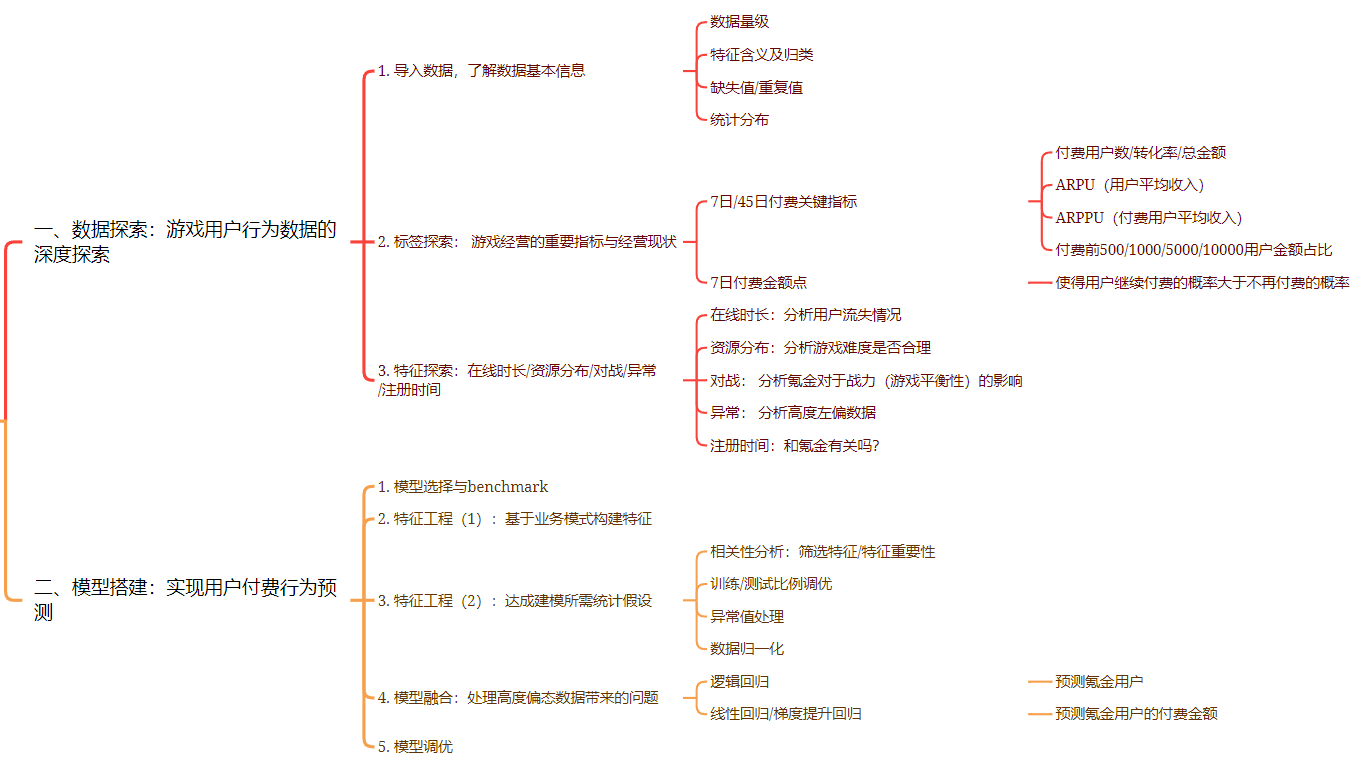

## 一、数据探索：游戏用户行为数据的深度探索

### 1. 导入数据，了解数据基本信息

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option("display.float_format", lambda x: "%.3f" % x) #避免显示问题，设置不显示科学计数法
import warnings #消除警告的代码
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

**导入数据**

In [2]:
data = pd.read_csv("tap_fun_train.csv")

In [3]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,...,0,0,0,0,0,0,0.333,0.000,0,0.000
1,1593,2018-01-26 00:01:05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0.333,0.000,0,0.000
2,1594,2018-01-26 00:01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,1.167,0.000,0,0.000
3,1595,2018-01-26 00:02:13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,3.167,0.000,0,0.000
4,1596,2018-01-26 00:02:46,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,2.333,0.000,0,0.000


**查看数据量级（以及样本数/特征数）**

In [4]:
data.shape

(2288007, 109)

<div class="alert alert-block alert-success">

* 2288007行，109列（200w+条数据）
* 109个特征中，第一列为玩家ID，最后一列为标签45日付费金额，因此实际特征量为107个特征
* 数据量巨大，因此模型选择上可能会倾向于选择简单快速的模型，而不是复杂模型
</div>

**导入字段解释数据以更改列名**

In [5]:
column_name = pd.read_excel("tap4fun 数据字段解释.xlsx")

In [6]:
# 更改列名 
data.columns = column_name["字段解释"]

In [7]:
data.head()

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
0,1,2018-02-02 19:47:15,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,...,0,0,0,0,0,0,0.333,0.000,0,0.000
1,1593,2018-01-26 00:01:05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0.333,0.000,0,0.000
2,1594,2018-01-26 00:01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,1.167,0.000,0,0.000
3,1595,2018-01-26 00:02:13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,3.167,0.000,0,0.000
4,1596,2018-01-26 00:02:46,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,2.333,0.000,0,0.000


**查看并总结特征（基于SLG游戏基本信息）**

In [8]:
# 查看完整特征列表
data.columns.tolist()

['玩家唯一ID',
 '玩家注册时间',
 '木头获取数量',
 '木头消耗数量',
 '石头获取数量',
 '石头消耗数量',
 '象牙获取数量',
 '象牙消耗数量',
 '肉获取数量',
 '肉消耗数量',
 '魔法获取数量',
 '魔法消耗数量',
 '勇士招募数量',
 '勇士损失数量',
 '驯兽师招募数量',
 '驯兽师损失数量',
 '萨满招募数量',
 '萨满损失数量',
 '勇士伤兵产生数量',
 '勇士伤兵恢复数量',
 '驯兽师伤兵产生数量',
 '驯兽师伤兵恢复数量',
 '萨满伤兵产生数量',
 '萨满伤兵恢复数量',
 '通用加速获取数量',
 '通用加速使用数量',
 '建筑加速获取数量',
 '建筑加速使用数量',
 '科研加速获取数量',
 '科研加速使用数量',
 '训练加速获取数量',
 '训练加速使用数量',
 '治疗加速获取数量',
 '治疗加速使用数量',
 '建筑：士兵小屋等级',
 '建筑：治疗小井等级',
 '建筑：要塞等级',
 '建筑：据点传送门等级',
 '建筑：兵营等级',
 '建筑：治疗之泉等级',
 '建筑：智慧神庙等级',
 '建筑：联盟大厅等级',
 '建筑：仓库等级',
 '建筑：瞭望塔等级',
 '建筑：魔法幸运树等级',
 '建筑：战争大厅等级',
 '建筑：联盟货车等级',
 '建筑：占卜台等级',
 '建筑：祭坛等级',
 '建筑：冒险传送门等级',
 '科研：侦查等级',
 '科研：训练速度等级',
 '科研：守护者',
 '科研：巨兽驯兽师',
 '科研：吟唱者',
 '科研：勇士攻击',
 '科研：驯兽师攻击',
 '科研：萨满攻击',
 '科研：战斗大师',
 '科研：高阶巨兽骑兵',
 '科研：图腾大师',
 '科研：部队防御',
 '科研：勇士防御',
 '科研：驯兽师防御',
 '科研：萨满防御',
 '科研：勇士生命',
 '科研：驯兽师生命',
 '科研：萨满生命',
 '科研：狂战士',
 '科研：龙骑兵',
 '科研：神谕者',
 '科研：部队攻击',
 '科研：建造速度',
 '科研：资源保护',
 '科研：部队消耗',
 '科研：木材生产',
 '科研：石头生产',
 '科研：象牙生产',
 '科研：肉类生产',
 '科研：木材采集',
 '科研：石头采集',


<div class="alert alert-block alert-success">
    
- 总结后的特征包括： 
 - 注册时间/在线时长 
 - 可获得/可消耗的资源
 - 可获得/可使用的道具
 - 可达到的等级（建筑/科研）
 - 可获得的技能（建筑/科研）
 - 对战信息
 - 付费信息
 
</div>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, 玩家唯一ID to 45日付费金额
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


<div class="alert alert-block alert-success">
    
- 数据量巨大（200w+条），info函数都无法显示出缺失值情况
- 数据类型：
 - 1. int64 - 95个 （包含id、target）
 - 2. float64 - 13个
 - 3. Object -1个（注册时间）
   - 注：有95列的数据类型都为int整数，通常来说，我们倾向于认为整数特征为离散型特征、但从游戏业务的独特性、以及特征含义来看，资源/等级/对战次数等数据为整数也很正常，该数据集中没有任何离散型特征。
    
</div>

**查看缺失值/重复值**

In [10]:
# 无缺失值
data.isnull().sum().sum()

0

In [11]:
# 无重复值
data.duplicated().sum()

0

**查看数据分布和统计信息**

In [12]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288007.000,1529543.498,939939.279,1.000,749992.500,1419095.000,2299006.500,3190530.000
木头获取数量,2288007.000,454306.859,4958667.146,0.000,0.000,42038.000,153118.000,1239962311.000
木头消耗数量,2288007.000,369843.252,3737720.038,0.000,0.000,9830.000,98557.000,799587506.000
石头获取数量,2288007.000,189778.774,4670619.517,0.000,0.000,0.000,0.000,1214869437.000
石头消耗数量,2288007.000,137607.363,3370166.356,0.000,0.000,0.000,0.000,796237770.000
...,...,...,...,...,...,...,...,...
PVE胜利次数,2288007.000,2.557,11.847,0.000,0.000,0.000,1.000,488.000
在线时长,2288007.000,10.207,38.959,0.000,0.500,1.833,4.833,2049.667
付费金额,2288007.000,0.535,22.638,0.000,0.000,0.000,0.000,7457.950


<div class="alert alert-block alert-success">
    
- 对于一些基础资源量（如木头、石头）7日可以积攒至上亿，猜测该游戏定位为低成本捞金游戏。
- 手游资源数据往往都是左偏的，因为可能50%左右的新增用户会在第二天就流失掉，因此大部分用户所掌握的资源量都很少。
  - 数据左偏的程度过高，如对基础资源石头来说，位于上四分位数的值依然是0，至少有75%的玩家未获得除木头以外的资源，用户流失十分严重
  - 高度偏态的信息不利于异常值检测，可以预见大量的长尾数据会被归为异常值，因此我们需要谨慎处理异常值

</div>

### 2. 标签探索：游戏经营的重要指标与经营现状

In [13]:
data.columns

Index(['玩家唯一ID', '玩家注册时间', '木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量',
       '象牙消耗数量', '肉获取数量', '肉消耗数量',
       ...
       'PVP次数', '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数', 'PVE胜利次数',
       '在线时长', '付费金额', '付费次数', '45日付费金额'],
      dtype='object', name='字段解释', length=109)

**查看标签y - 45日付费金额**

In [14]:
y = data.iloc[:,-1]

In [15]:
y

0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
           ... 
2288002   0.000
2288003   0.000
2288004   0.000
2288005   0.000
2288006   0.000
Name: 45日付费金额, Length: 2288007, dtype: float64

In [16]:
# 查看y的分布
y.describe([0.75,0.9,0.95,0.98,0.99])

count   2288007.000
mean          1.793
std          88.463
min           0.000
50%           0.000
75%           0.000
90%           0.000
95%           0.000
98%           0.990
99%           3.970
max       32977.810
Name: 45日付费金额, dtype: float64

**查看7日付费金额**

In [17]:
SevenDayPayAmount = data.loc[:,"付费金额"]

In [18]:
SevenDayPayAmount.describe([0.75,0.9,0.95,0.98,0.99])

count   2288007.000
mean          0.535
std          22.638
min           0.000
50%           0.000
75%           0.000
90%           0.000
95%           0.000
98%           0.000
99%           1.980
max        7457.950
Name: 付费金额, dtype: float64

<div class="alert alert-block alert-success">
    
- 由于游戏行业的特殊性，经常存在10%的付费用户养全服的情况，因此添加0.9，0.95，0.98，0.99多个选项
- 从结果来看，无论是前7日还是45日，均有98%左右的用户都没有付费，游戏的付费转化情况很差
    
</div>

**编写方法'RevenueFocus'，用于展示7日与45日付费情况的关键指标**

<div class="alert alert-block alert-success">
    
- 关键指标包括：
  - 付费用户数
  - 付费转化率
  - 付费总金额
  - ARPU(用户平均收入)
  - ARPPU(付费用户平均收入)
  - 付费前500用户总金额占比  
  - 付费前1000用户总金额占比
  - 付费前5000用户总金额占比
  - 付费前10000用户总金额占比
    
</div>

In [19]:
def RevenueFocus(RevenueSeries):

    AllUsers = len(RevenueSeries) # 用户总数
    PaidUsers = (RevenueSeries != 0).sum() # 付费用户数
    TotalPayment = RevenueSeries.sum() # 付费总金额
    
    print("付费用户数：{}".format(PaidUsers))
    print("付费转化率：{:.3f}%".format(100*PaidUsers/AllUsers))
    print("付费总金额：{:.3f}".format(TotalPayment))
    print("ARPU(用户平均收入)：{:.3f}".format(TotalPayment/AllUsers)) 
    print("ARPPU(付费用户平均收入)：{:.3f}".format(TotalPayment/PaidUsers))
    print("付费前500用户总金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:500].sum()/TotalPayment))
    print("付费前1000用户总金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:1000].sum()/TotalPayment))
    print("付费前5000用户总金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:5000].sum()/TotalPayment))
    print("付费前10000用户总金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:10000].sum()/TotalPayment))

**调用方法'RevenueFocus'，查看45日付费情况**

In [20]:
RevenueFocus(y)

付费用户数：45988
付费转化率：2.010%
付费总金额：4102730.110
ARPU(用户平均收入)：1.793
ARPPU(付费用户平均收入)：89.213
付费前500用户总金额占比：51.618%
付费前1000用户总金额占比：64.878%
付费前5000用户总金额占比：89.375%
付费前10000用户总金额占比：95.403%


In [21]:
y.max()

32977.81

**调用方法'RevenueFocus'，查看7日付费情况**

In [22]:
RevenueFocus(SevenDayPayAmount)

付费用户数：41439
付费转化率：1.811%
付费总金额：1223326.660
ARPU(用户平均收入)：0.535
ARPPU(付费用户平均收入)：29.521
付费前500用户总金额占比：45.211%
付费前1000用户总金额占比：57.231%
付费前5000用户总金额占比：83.002%
付费前10000用户总金额占比：91.981%


In [23]:
SevenDayPayAmount.max()

7457.95

**付费前10000用户在总用户数的占比**

In [24]:
10000/data.shape[0]

0.004370615998989514

<div class="alert alert-block alert-success">

- 综合7日和45日付费情况，付费转化率只有2%左右，明显偏低。
  - 2016年时全球手游的付费转化率就有2.3%，而该项目背景是在2018年。2020年SLG手游的平均付费转化率大约在5%左右，顶级手游的付费转化率能够接近15%。
  - 《野蛮时代》的制作公司Tap4fun具有丰富的SLG手游经验，并且在开服测试阶段就有200w用户数据，付费转化率本应更高。
  - 45日仅400w+的收入，可能还不及220w+用户的流量成本，因此收入状况不算理想。
- 前7日付费的ARPU为0.535元，ARPPU为29.521元；45日付费的ARPU为1.793元，ARPPU为89.213元
  - 综合来看ARPU较低，但ARPPU还不错，说明虽然付费人数不多，但氪金大佬们的付费能力相对较强，45日付费前10000（占比小于0.5%）的用户提供了95%以上的收入；推测该游戏中的付费行为与竞争PK有很大关系，如通过付费来提升PVP的胜率等
  - 45日付费最多的用户的付费金额只有3w3左右，在SLG手游领域不算高
- 因此付费用户人数较少的问题需要改善，且氪金大佬们的付费金额还有很大提升空间。

</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 前7日未付费的用户，7日后至45日内会付费的可能性是多少？    
2. 前7日付费过的用户，7日后还会付费的可能性是多少？
    
</div>

**计算【7日后的新增付费用户数】（即前7日未消费，但45日内消费的用户数）**

In [25]:
45988 - 41439

4549

**计算【前7日未付费用户数】与【前7日付费用户数】**

In [26]:
# 前7日未付费用户数
(SevenDayPayAmount == 0).sum()

2246568

In [27]:
# 前7日付费用户数
(SevenDayPayAmount != 0).sum()

41439

**计算7日前后均付费用户数**

In [28]:
SevenDayPayAmount[SevenDayPayAmount != 0][SevenDayPayAmount!=y].count()

11309

**计算思考1：【7日后新增付费用户数】在【前7日未付费用户数】的占比**

In [29]:
4549/2246568

0.002024866373953515

**计算思考2：【7日前后均付费用户数】在【前7日付费用户数】的占比**

In [30]:
11309/41439

0.27290716474818405

<div class="alert alert-block alert-success">
    
- 7日后的新增付费用户仅有4549人，占前7日未付费用户数的0.2%
  - 说明如果用户在前7日没有付费，那么在未来的一个月有99.8%的可能性都不会付费！
- 7日前后均有消费的用户数为11309人，占前7日付费用户数的27%
  - 说明如果用户在前7日付过费，那么在未来的一个月还是有73%的可能性不再进行付费！
- 合理推测原因可能为：
  - 1.游戏本身粘性不足，大量用户在7-45日内（甚至在7日内）已经流失，无法完成付费转化。
  - 2.用户流失情况在正常范围内，但在（超低价/实惠的）新手福利活动后，严重缺少有效的转化手段（价格过高/性价比低超出预期）。
  - 3.游戏在开局发育时的付费需求强烈，但可能由于游戏设计问题，发育起来后逐渐失去付费需求/付费后却无法发育体验差。
</div>

<div class="alert alert-block alert-warning">
    
**思考：**     
1. 前7日付费的用户中，7日后不再付费与继续付费的用户，他们在前7日的付费情况上有差异吗？   
2. 前7日付费且7日后继续付费的用户，他们在45日的付费和前7日的付费情况上如何变化？

</div>

**查看前7日付费用户中，7日后不再付费的用户的前7日付费情况**

In [31]:
# 7日后不再付费的用户前7日的付费概况
SevenDayPayAmount[SevenDayPayAmount != 0][SevenDayPayAmount==y].describe()

count   30130.000
mean       11.407
std        71.135
min         0.990
25%         0.990
50%         1.980
75%         5.980
max      4086.520
Name: 付费金额, dtype: float64

In [32]:
# 7日后不再付费的用户前7日的付费金额总和
SevenDayPayAmount[SevenDayPayAmount != 0][SevenDayPayAmount==y].sum()

343705.17000000004

**查看前7日付费用户中，7日后继续付费用户的前7日付费情况**

In [33]:
# 7日后继续付费的用户前7日的付费概况
SevenDayPayAmount[SevenDayPayAmount != 0][SevenDayPayAmount!=y].describe()

count   11309.000
mean       77.781
std       289.610
min         0.990
25%         2.980
50%        15.970
75%        45.940
max      7457.950
Name: 付费金额, dtype: float64

In [34]:
# 7日后继续付费的用户前7日的付费金额总和
SevenDayPayAmount[SevenDayPayAmount != 0][SevenDayPayAmount!=y].sum()

879621.4900000001

**绘制箱型图，对比前7日付费用户中，7日后不再付费 vs. 7日后继续付费 这两类用户在前7日的付费分布情况**

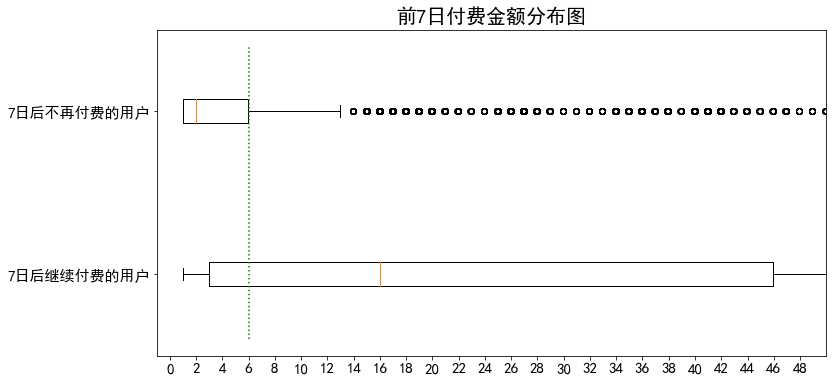

In [35]:
plt.figure(figsize=(12,6))
plt.boxplot([SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0],SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0]],labels=["7日后继续付费的用户","7日后不再付费的用户"],vert=False,showmeans=False)
plt.xlim(-1,50)
plt.title('前7日付费金额分布图',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,50,2),fontsize=15.0)
plt.vlines(6.0,ymin = plt.ylim()[0]+0.1,ymax = plt.ylim()[1]-0.1,colors="green",linestyles="dotted")
plt.show()

**查看前7日付费用户中，7日后继续付费用户的45日付费情况**

In [36]:
# 7日后继续付费的用户45日的付费概况
y[SevenDayPayAmount != 0][SevenDayPayAmount!=y].describe()

count   11309.000
mean      315.963
std      1202.828
min         1.980
25%        16.940
50%        48.920
75%       163.760
max     32977.810
Name: 45日付费金额, dtype: float64

In [37]:
# 7日后继续付费的用户45日的付费金额总和
y[SevenDayPayAmount != 0][SevenDayPayAmount!=y].sum()

3573230.9399999995

<div class="alert alert-block alert-success">
    
- 在前7日付费用户中：
  - 7日后不再付费的用户，其中75%的人只付了不到6元的金额；而7日后继续付费的用户，其中50%以上的人付了近16元的金额
    - 结合箱型图，7日后不再付费和继续付费的这两类用户，他们在前7日的付费金额的范围差不多，但继续付费用户的付费金额分布靠右很多
    - 说明7日后继续付费的用户在前7日的付费金额会更高，印证了之前的猜想：大量用户在付费新手礼包后，后续的礼包价格超出了他们的预期。
  - 7日后不再付费的用户，其中也不乏付费过百过千的，最高也有4000多，猜测不再付费（或弃游）的原因可能是自然流失或付费后体验较差。
  - 7日后继续付费的用户，其付费金额是越来越多的，推测大部分人对于付费后的体验不错。
- 由上述数据及其分布：
  - 前7日付费在6~16元的用户可能是高价值用户，能够作为评判高价值用户的标准之一，可以据此区分用户的付费能力
</div>

<div class="alert alert-block alert-warning">
    
**思考：**     
- 根据上述评判高价值用户的标准——前7日付费在6~16元的用户是更有价值的用户:
  - 对于前7日付费用户，任意的付费金额都有一定的概率继续付费，也有一定的概率不再付费，且两个概率相加为1
  - 根据历史数据，随着前7日付费金额的增加，用户继续付费的可能性越大
  - 因此，一定存在一个**前7日付费金额点**，使得用户继续付费的概率大于不再付费的概率（为了提高区分能力）。

</div>

**编写一个方法并绘图，找出前7日付费金额点**

当7日内付费金额大于6.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于7.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于8.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于9.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于10.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于11.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于12.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于13.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于14.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于15.00元时，用户继续付费的可能性比不再付费的可能性更高！
当7日内付费金额大于16.00元时，用户继续付费的可能性比不再付费的可能性更高！


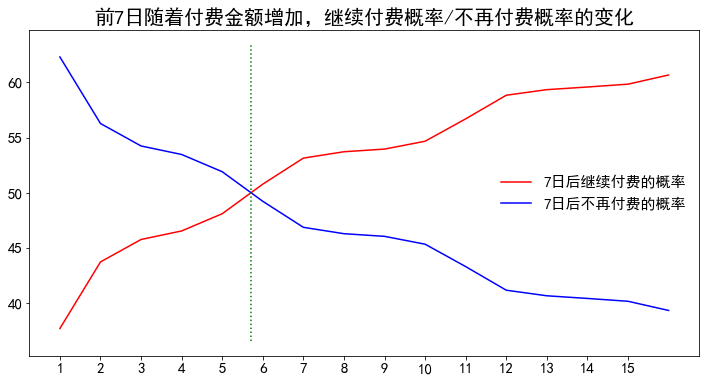

In [38]:
KeepPaidList = []
StopPaidList = []
for i in range(1,17):
    #取出所有7天内付费金额超出i的付费用户
    HigherThanPoint = SevenDayPayAmount[SevenDayPayAmount>=i] 
    #这些用户中，继续付费的用户所占的比例（继续付费的概率）
    KeepPaid = len(HigherThanPoint[SevenDayPayAmount != y])/len(HigherThanPoint) 
    #这些用户中，不再付费的用户所占的比例（不再付费的概率）
    StopPaid = len(HigherThanPoint[SevenDayPayAmount == y])/len(HigherThanPoint)
    KeepPaidList.append(100*KeepPaid)
    StopPaidList.append(100*StopPaid)
    if KeepPaid - StopPaid > 0:
        print("当7日内付费金额大于{:.2f}元时，用户继续付费的可能性比不再付费的可能性更高！".format(i))
plt.figure(figsize=(12,6))
plt.plot(range(1,17),KeepPaidList,label="7日后继续付费的概率",color="red")
plt.plot(range(1,17),StopPaidList,label="7日后不再付费的概率",color="blue")
#plt.xlim(-1,50)
plt.title('前7日随着付费金额增加，继续付费概率/不再付费概率的变化',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,16,1),fontsize=15.0)
plt.legend(fontsize = 15.0, frameon = False)
plt.vlines(5.7,ymin = plt.ylim()[0]+0.1,ymax = plt.ylim()[1]-0.1,colors="green",linestyles="dotted")
plt.show()

<div class="alert alert-block alert-success">
    
 - 前7日内付费5.7元以下的用户，继续付费的概率均小于不再付费的概率：
    - 可以针对付费5元左右的用户改善游戏体验，促使继续付费
    - 也可以直接放弃6元以下的付费用户，维持现状或减少资源分配，为高价值用户提供更多资源
 - 综上，选取6元为前7日付费金额点，定义**前7日付费不少于6元的用户是高价值用户。**
</div>

### 3. 特征探索：在线时长/资源分布/对战/异常/注册时间

#### 3.1 在线时长：分析用户流失情况

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 在分析资源和付费的分布情况时，我们推测存在大量用户流失的情况。
2. 通常，手游的次日留存率的及格线在50%以上，7日留存率应该在30%左右。
3. 如何根据“在线时长”特征，即前7日用户在线的时长，估算用户留存率（或流失速度）呢？
    
</div>

In [39]:
PlayTime = data.loc[:,"在线时长"]

**前7日在线时长TOP5的玩家用户的在线时长**

In [40]:
data['在线时长'].sort_values(ascending=False).head()

488497    2049.667
1263615   1674.667
882241    1482.000
1335561   1452.333
1558221   1452.333
Name: 在线时长, dtype: float64

In [41]:
PlayTime.describe(percentiles=[0.75,0.9,0.85,0.95,0.99]) 

count   2288007.000
mean         10.207
std          38.959
min           0.000
50%           1.833
75%           4.833
85%           9.333
90%          15.000
95%          41.333
99%         183.657
max        2049.667
Name: 在线时长, dtype: float64

<div class="alert alert-block alert-success">
    
 - 7日等于168小时，因此最大的数值2049的单位应为分钟，2049分钟约等于34小时
    - 即前7日游戏在线时长最长的用户玩了34小时，平均每天玩近5个小时。
 - 75%的用户在前7日只玩了5分钟不到，85%用户在前7日只玩了10分钟不到
    - 说明75%以上的用户只是登录了一下游戏就没有继续玩了
    - 而SLG手游通常设置了丰富的任务和剧情，尤其是新手玩家（如引导教程）的停留时间应会更长；若新用户在第二天依然留存，那两天的在线时长至少应在10分钟以上
    - 因此，推断大约只有10~15%的用户在第二天依然留存
    - 假设每天玩5分钟以上，推断7日后只有不到5%的用户依然留存。
 - 综上，**次日留存率约为10~15%，7日留存率不足5%**，用户流失情况十分严重，付费转化率低也就合理了。
    - 推测用户大量流失的原因可能为：
      - 投放的渠道不合适或投放的广告有问题；
      - 游戏美工或剧情流畅度设计存在问题；
      - 游戏上手难度大且资源分配不合理（*后面通过资源分布来专门探讨*）
</div>

<div class="alert alert-block alert-warning">
 
**思考：**
1. 在线时长和付费行为有什么关系吗？能否根据在线时长来衡量用户价值呢？
    
</div>

**查看前7日付费用户们的在线时长分布**

In [42]:
PaidPlayTime = data.loc[data["付费金额"] != 0,"在线时长"]

In [43]:
PaidPlayTime.describe().T

count   41439.000
mean      140.188
std       149.973
min         0.000
25%        33.000
50%        88.833
75%       194.667
max      1674.667
Name: 在线时长, dtype: float64

**查看前7日非付费用户们的在线时长分布**

In [44]:
NotPaidPlayTime = data.loc[data["付费金额"] == 0,"在线时长"]

In [45]:
NotPaidPlayTime.describe().T

count   2246568.000
mean          7.810
std          28.524
min           0.000
25%           0.500
50%           1.833
75%           4.500
max        2049.667
Name: 在线时长, dtype: float64

**查看前7日在线时长TOP5用户的金额分布**

In [46]:
data.loc[data["在线时长"] > 1452,"付费金额"]

488497    0.000
882241    0.000
1263615   2.980
1335561   0.990
1558221   3.970
Name: 付费金额, dtype: float64

**查看前7日在线时长小于1分钟的用户的金额分布**

In [47]:
data.loc[data["在线时长"]<=1,"付费金额"].value_counts()

0.000     896061
0.990         51
9.990          4
5.980          3
36.960         3
4.990          3
99.990         2
56.950         2
6.980          1
25.970         1
19.990         1
49.990         1
1.990          1
26.970         1
Name: 付费金额, dtype: int64

<div class="alert alert-block alert-success">
 
 - 前7日付费用户中，只有25%以下的用户在线时间在半小时以下；而前7日非付费用户中，超过75%的用户在线时长不足5分钟，由此，付费用户的在线时长明显比非付费用户多很多
 - 前7日在线时长很长的用户付费金额不一定高，在线时长很短的用户也会闭眼付费较大金额
</div>

**查看前7日在线时长很少（35min以下，即平均一天5min以下）的用户的付费情况（7日/45日）**

In [48]:
for playtime in [1,5,10,15,20,25,30,35]:
    
    MeanPay45 = data.loc[data["在线时长"]<playtime,"45日付费金额"].mean()
    TotalPay45 = data.loc[data["在线时长"]<playtime,"45日付费金额"].sum()
    MeanPay7 = data.loc[data["在线时长"]<playtime,"付费金额"].mean()
    TotalPay7 = data.loc[data["在线时长"]<playtime,"付费金额"].sum()
    
    print("7日在线时长不足{}分钟".format(playtime))
    print("\t45日平均消费额为{:.3f}元，45日总消费额为{:.3f}元".format(MeanPay45,TotalPay45))
    print("\t7日平均消费额为{:.3f}元，7日总消费额为{:.3f}元".format(MeanPay7,TotalPay7))
    print("\t7日付费占比{:.3f}%，45日付费占比{:.3f}%".format(100*TotalPay7/(data["付费金额"].sum())
                                                  ,100*TotalPay45/(data["45日付费金额"].sum())))

7日在线时长不足1分钟
	45日平均消费额为0.022元，45日总消费额为18323.490元
	7日平均消费额为0.001元，7日总消费额为574.180元
	7日付费占比0.047%，45日付费占比0.447%
7日在线时长不足5分钟
	45日平均消费额为0.019元，45日总消费额为32572.700元
	7日平均消费额为0.003元，7日总消费额为4519.280元
	7日付费占比0.369%，45日付费占比0.794%
7日在线时长不足10分钟
	45日平均消费额为0.023元，45日总消费额为44527.180元
	7日平均消费额为0.006元，7日总消费额为11151.310元
	7日付费占比0.912%，45日付费占比1.085%
7日在线时长不足15分钟
	45日平均消费额为0.028元，45日总消费额为57753.190元
	7日平均消费额为0.009元，7日总消费额为18428.260元
	7日付费占比1.506%，45日付费占比1.408%
7日在线时长不足20分钟
	45日平均消费额为0.038元，45日总消费额为79124.920元
	7日平均消费额为0.012元，7日总消费额为25904.310元
	7日付费占比2.118%，45日付费占比1.929%
7日在线时长不足25分钟
	45日平均消费额为0.044元，45日总消费额为94650.110元
	7日平均消费额为0.016元，7日总消费额为34217.390元
	7日付费占比2.797%，45日付费占比2.307%
7日在线时长不足30分钟
	45日平均消费额为0.050元，45日总消费额为107763.140元
	7日平均消费额为0.019元，7日总消费额为40862.200元
	7日付费占比3.340%，45日付费占比2.627%
7日在线时长不足35分钟
	45日平均消费额为0.056元，45日总消费额为121238.640元
	7日平均消费额为0.022元，7日总消费额为48341.490元
	7日付费占比3.952%，45日付费占比2.955%


**查看前7日在线时长很长的用户的付费情况（7日/45日）**

In [49]:
#时长前0.1%的用户的7日在线时长
data["在线时长"].sort_values(ascending=False)[:2288]

488497    2049.667
1263615   1674.667
882241    1482.000
1335561   1452.333
1558221   1452.333
            ...   
527722     504.500
1257763    504.333
2145496    504.333
2065723    504.333
1815137    504.333
Name: 在线时长, Length: 2288, dtype: float64

In [50]:
for playtime in [500,600,700,800,900,1000,1200]:
    
    MeanPay45 = data.loc[data["在线时长"]>=playtime,"45日付费金额"].mean()
    TotalPay45 = data.loc[data["在线时长"]>=playtime,"45日付费金额"].sum()
    MeanPay7 = data.loc[data["在线时长"]>=playtime,"付费金额"].mean()
    TotalPay7 = data.loc[data["在线时长"]>=playtime,"付费金额"].sum()
    
    print("7日在线时长超过{}分钟".format(playtime))
    print("\t45日平均消费额为{:.3f}元，45日总消费额为{:.3f}元".format(MeanPay45,TotalPay45))
    print("\t7日平均消费额为{:.3f}元，7日总消费额为{:.3f}元".format(MeanPay7,TotalPay7))
    print("\t7日付费占比{:.3f}%，45日付费占比{:.3f}%".format(100*TotalPay7/(data["付费金额"].sum())
                                                  ,100*TotalPay45/(data["45日付费金额"].sum())))

7日在线时长超过500分钟
	45日平均消费额为377.113元，45日总消费额为885839.060元
	7日平均消费额为110.492元，7日总消费额为259544.740元
	7日付费占比21.216%，45日付费占比21.591%
7日在线时长超过600分钟
	45日平均消费额为437.753元，45日总消费额为515673.070元
	7日平均消费额为130.699元，7日总消费额为153963.300元
	7日付费占比12.586%，45日付费占比12.569%
7日在线时长超过700分钟
	45日平均消费额为427.776元，45日总消费额为272921.300元
	7日平均消费额为120.904元，7日总消费额为77136.600元
	7日付费占比6.305%，45日付费占比6.652%
7日在线时长超过800分钟
	45日平均消费额为359.040元，45日总消费额为113815.780元
	7日平均消费额为104.344元，7日总消费额为33076.950元
	7日付费占比2.704%，45日付费占比2.774%
7日在线时长超过900分钟
	45日平均消费额为218.907元，45日总消费额为36557.400元
	7日平均消费额为43.819元，7日总消费额为7317.770元
	7日付费占比0.598%，45日付费占比0.891%
7日在线时长超过1000分钟
	45日平均消费额为139.194元，45日总消费额为12109.910元
	7日平均消费额为40.055元，7日总消费额为3484.820元
	7日付费占比0.285%，45日付费占比0.295%
7日在线时长超过1200分钟
	45日平均消费额为25.492元，45日总消费额为637.300元
	7日平均消费额为2.869元，7日总消费额为71.730元
	7日付费占比0.006%，45日付费占比0.016%


<div class="alert alert-block alert-success">
 
 - 在线时长很少的用户们的付费金额占比很少，我们可以将7日在线时长不足20分钟的用户定义为低价值用户。
 - 许多用户虽然在线时长特别长，但是付费金额并没有相对应变多，我们可以将7日在线时长超出800分钟的用户定义为低价值用户。
 - 综上，**7日在线时长在20~800分钟的用户为高价值用户**（付费层面）
</div>

#### 3.2 资源分布：分析游戏难度是否合理

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 由前面提到的“用户留存率低的原因可能为——游戏上手难度大且资源配比不合理（资源获取有问题）”：
    - 能否通过探索资源特征数据来验证以上原因是否属实？
    
</div>

**查看数据分布情况**

In [51]:
pd.set_option("display.max_rows",120) #避免显示问题，设置一下最大行数
data.describe().T

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288007.000,1529543.498,939939.279,1.000,749992.500,1419095.000,2299006.500,3190530.000
木头获取数量,2288007.000,454306.859,4958667.146,0.000,0.000,42038.000,153118.000,1239962311.000
木头消耗数量,2288007.000,369843.252,3737720.038,0.000,0.000,9830.000,98557.000,799587506.000
石头获取数量,2288007.000,189778.774,4670619.517,0.000,0.000,0.000,0.000,1214869437.000
石头消耗数量,2288007.000,137607.363,3370166.356,0.000,0.000,0.000,0.000,796237770.000
象牙获取数量,2288007.000,80756.230,2220540.322,0.000,0.000,0.000,0.000,574496104.000
象牙消耗数量,2288007.000,36131.699,1782498.688,0.000,0.000,0.000,0.000,448197157.000
肉获取数量,2288007.000,585515.505,5868629.397,0.000,0.000,34587.000,136001.000,1470643810.000
肉消耗数量,2288007.000,354810.206,3400632.455,0.000,0.000,6470.000,66054.000,888953714.000


<div class="alert alert-block alert-success">
 
- 再次发现，大量资源（包括技能、等级）数据都是严重左偏的，大量资源被很少一部用户拥有，而用户大量流失也进一步合理化了这一点（若所有用户都能留存到7日以后，资源分布应该接近正态分布）

</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 提出另一种猜想：用户留存率低可能才是导致资源分布不均的原因（而并不是游戏本身的资源分配不合理）？
2. 能否根据获取难度对各类资源进行分类，从而判断游戏是否真的资源配比不合理（对新手不友好）？
    
</div>

**尝试观察获取资源的平均在线时长，以此衡量资源获取难度**

In [52]:
data["木头获取数量"].describe()

count      2288007.000
mean        454306.859
std        4958667.146
min              0.000
25%              0.000
50%          42038.000
75%         153118.000
max     1239962311.000
Name: 木头获取数量, dtype: float64

In [53]:
data.loc[data["木头获取数量"] > 1239962310,"在线时长"]

1423324   697.333
Name: 在线时长, dtype: float64

In [54]:
data.loc[data["木头获取数量"] == 153118,"在线时长"].mean() 

3.75

In [55]:
data.loc[data["木头获取数量"] == 42038,"在线时长"].mean() 

1.2527109844413018

<div class="alert alert-block alert-success">
    
- 根据获取“木头”的平均在线时长结果：
    - 在线时长约10个小时，即每天玩1个多小时，一周即可获得木头资源过亿
    - 平均在线约3.75分钟即可获得15w木头
    - 平均在线1分钟即可获得4w2木头
- 由此，至少“木头”资源是极容易获取的。
- 除了平均在线时长，还可以通过资源分布本身来衡量资源获取难度，但由于数据量巨大且特征维数大，因此无法对所有特征绘制分布图，但可以计算特征的**偏度/峰度/均值**。
- 只衡量资源（包括技能/等级），不衡量涉及到对战的特征。
</div>

**计算资源（包括技能/等级）特征的偏度/峰度/均值**

In [56]:
resource = data.iloc[:,2:-10]

In [57]:
resource.columns

Index(['木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量', '象牙消耗数量', '肉获取数量',
       '肉消耗数量', '魔法获取数量', '魔法消耗数量', '勇士招募数量', '勇士损失数量', '驯兽师招募数量', '驯兽师损失数量',
       '萨满招募数量', '萨满损失数量', '勇士伤兵产生数量', '勇士伤兵恢复数量', '驯兽师伤兵产生数量', '驯兽师伤兵恢复数量',
       '萨满伤兵产生数量', '萨满伤兵恢复数量', '通用加速获取数量', '通用加速使用数量', '建筑加速获取数量', '建筑加速使用数量',
       '科研加速获取数量', '科研加速使用数量', '训练加速获取数量', '训练加速使用数量', '治疗加速获取数量', '治疗加速使用数量',
       '建筑：士兵小屋等级', '建筑：治疗小井等级', '建筑：要塞等级', '建筑：据点传送门等级', '建筑：兵营等级',
       '建筑：治疗之泉等级', '建筑：智慧神庙等级', '建筑：联盟大厅等级', '建筑：仓库等级', '建筑：瞭望塔等级',
       '建筑：魔法幸运树等级', '建筑：战争大厅等级', '建筑：联盟货车等级', '建筑：占卜台等级', '建筑：祭坛等级',
       '建筑：冒险传送门等级', '科研：侦查等级', '科研：训练速度等级', '科研：守护者', '科研：巨兽驯兽师', '科研：吟唱者',
       '科研：勇士攻击', '科研：驯兽师攻击', '科研：萨满攻击', '科研：战斗大师', '科研：高阶巨兽骑兵', '科研：图腾大师',
       '科研：部队防御', '科研：勇士防御', '科研：驯兽师防御', '科研：萨满防御', '科研：勇士生命', '科研：驯兽师生命',
       '科研：萨满生命', '科研：狂战士', '科研：龙骑兵', '科研：神谕者', '科研：部队攻击', '科研：建造速度',
       '科研：资源保护', '科研：部队消耗', '科研：木材生产', '科研：石头生产', '科研：象牙生产', '科研：肉类生产',
       '科研：木材采集', '科研：石头采集', '科研

In [58]:
sak = pd.DataFrame()
for idx,ColName in enumerate(resource.columns):
    sak.loc[idx,"特征"] = ColName
    column = data.loc[:,ColName]
    sak.loc[idx,"偏度"] = column.skew() #偏度
    sak.loc[idx,"峰度"] = column.kurt() #峰度
    sak.loc[idx,"均值"] = column.mean() #均值

In [59]:
sak

,特征,偏度,峰度,均值
0,木头获取数量,100.635,15449.582,454306.859
1,木头消耗数量,86.310,11367.448,369843.252
2,石头获取数量,113.794,18489.107,189778.774
3,石头消耗数量,105.043,15515.988,137607.363
4,象牙获取数量,112.636,17682.030,80756.230
5,象牙消耗数量,113.405,16974.594,36131.699
6,肉获取数量,106.645,17907.029,585515.505
7,肉消耗数量,89.403,13600.967,354810.206
8,魔法获取数量,97.762,14958.235,75389.535
9,魔法消耗数量,109.334,18322.774,47253.994


<div class="alert alert-block alert-success">
    
- 偏度和峰度似乎有很强的相关性？画个图看看。
</div>

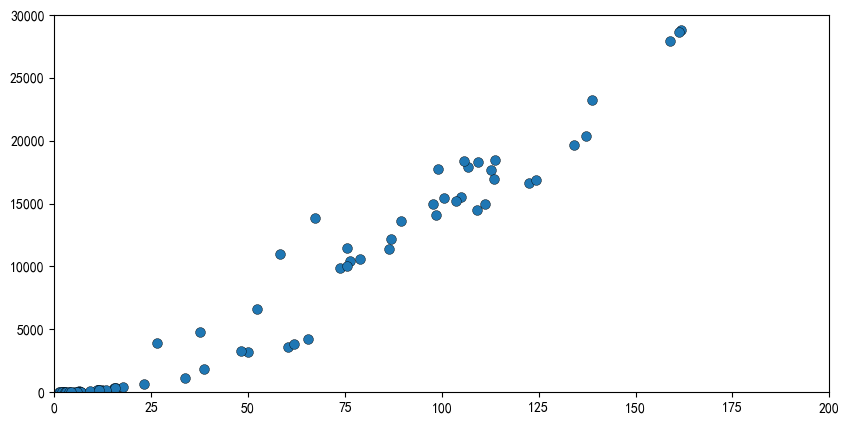

In [60]:
plt.figure(figsize=(10,5),dpi=100)
plt.scatter("偏度","峰度", data = sak
           ,s = 50
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(0, 200) 
plt.ylim(0, 30000)
plt.show()

<div class="alert alert-block alert-success">
    
- 分析偏度与峰度的强相关性：
    - 对该游戏资源数据而言，偏度与峰度衡量的内容是类似的：
      - 偏度说明分布对称的情况，峰度说明分布集中在少数点的情况，巨大的正偏态和巨大的峰度都指向“大部分玩家只能收集到很少资源/或无资源”的状态。
- 结合单一资源的均值，我们就可以进一步判断资源获取的真实情况。
- 因此，我们可以**只考虑偏度与均值**，不再考虑峰度了。
</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 如何根据偏度和均值进行分类？
    
</div>

<div class="alert alert-block alert-success">
    
- 绘制横坐标为偏度，纵坐标为均值的散点图，就可以概括出偏度与均值之间的关系，并总结出不同资源/不同等级的设置类型，一次来判断游戏中的各项资源的获得难易程度是否合理。
</div>

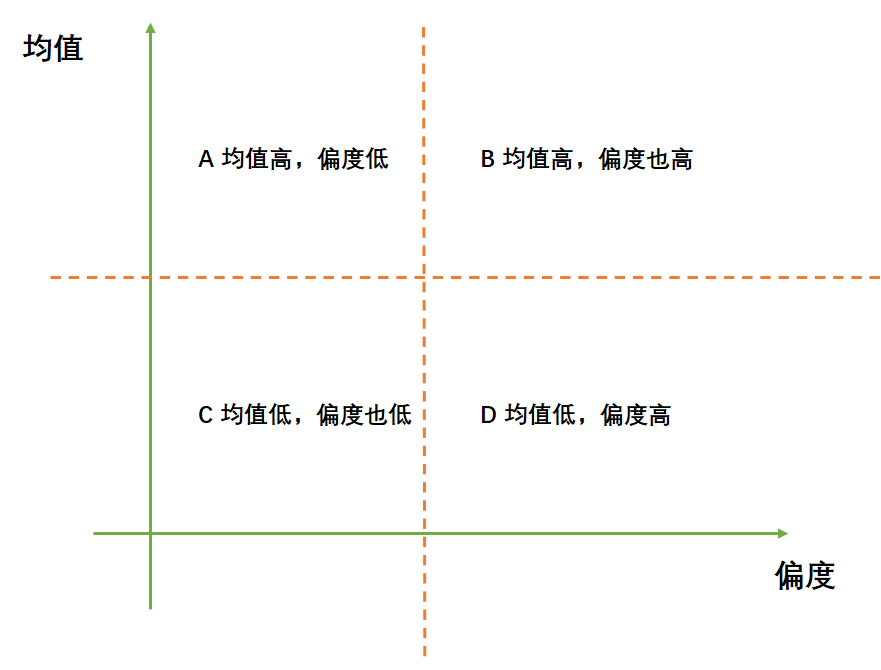

<div class="alert alert-block alert-success">
    
- A类 **均值高，偏度低**：用户拥有该资源的分布较为均匀，并且大家都拥有很多这个资源，这类资源是最容易获取的
</div>

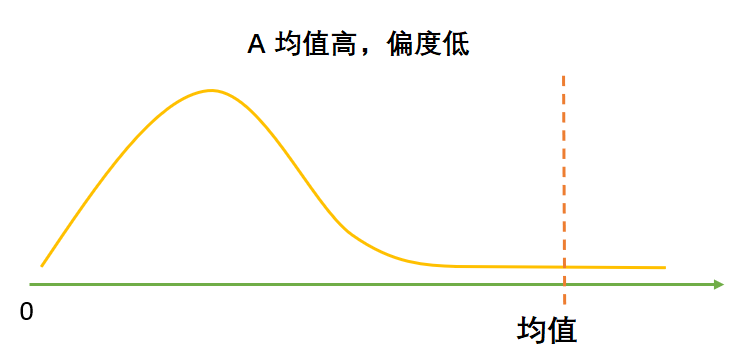

<div class="alert alert-block alert-success">
    
- B类 均值高，偏度也高：用户拥有该资源的分布不均匀，少量玩家掌握巨量资源（长尾会非常非常长），拉高了均值，这类资源可能是氪金资源，也可能是爆肝才能获得的资源
</div>

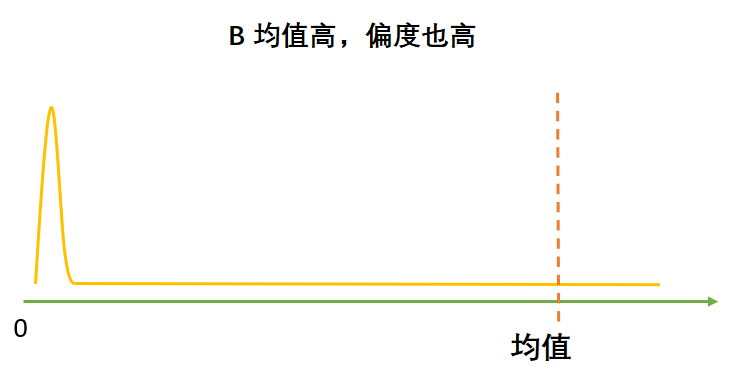

<div class="alert alert-block alert-success">
    
- C类 均值低，偏度也低：用户拥有该资源的分布较为均匀，但大家都没有这个资源，这类资源可能是需要时间来积累才能够获得的，随着开服时间变长，这类资源应该会逐渐变成其他类型的资源
</div>

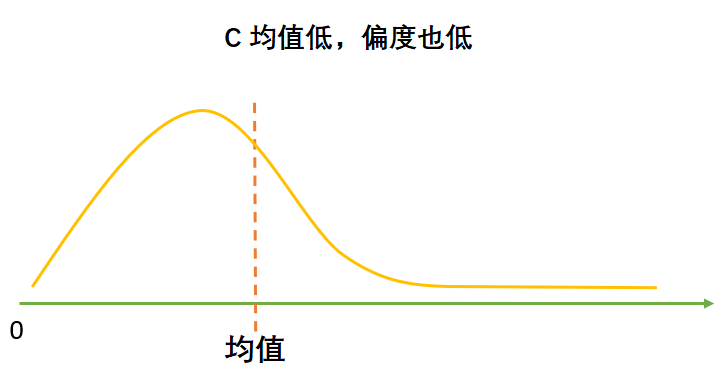

<div class="alert alert-block alert-success">
    
- D类 **均值低，偏度高**：用户拥有该资源的分布不均匀，只有少量玩家掌握该资源，但是掌握的总量也不多。这类资源天生稀缺并且无法靠氪金获得（比如必须触发特定剧情/达到特定成就才能够获得的资源），只有少数人能够拥有
</div>

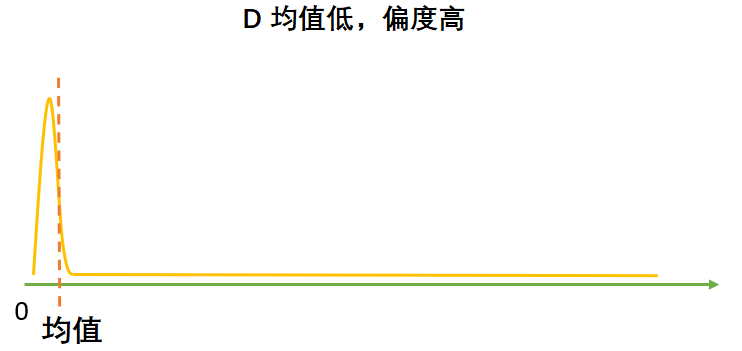

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 在一个健康的游戏（平衡性好）中，ABCD各类资源的分布应是什么样子的？
    
</div>

<div class="alert alert-block alert-success">
    
- A类资源应该是最多的，这类资源决定了剧本能够被推进的程度、决定了大部分玩家的游戏体验；
- B类资源主要用于付费，收入的主要来源，但可能严重破坏游戏平衡；
- D类资源主要在于增加游戏的趣味和公平性，应该是最少的；
- 一个游戏的A类资源要足够多，才算是对新手比较友好。
</div>

**绘制出ABCD四类资源的分布散点图**

In [61]:
print(sak["偏度"].max())
print(sak["偏度"].min())
print(sak["均值"].max())
print(sak["均值"].min())

1446.870493367135
1.229280867942684
585515.5045294879
2.185307999494757e-06


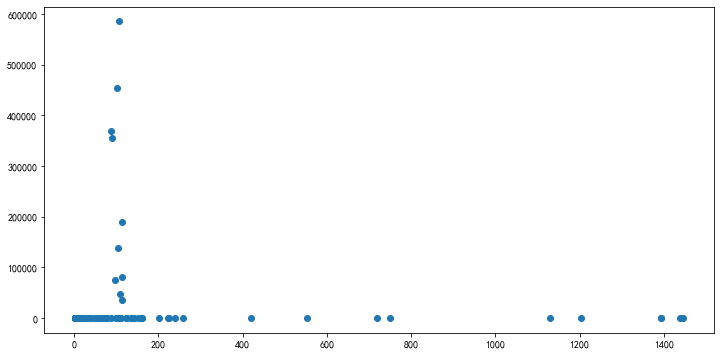

In [62]:
plt.figure(figsize=(12,6))
plt.scatter("偏度","均值", data = sak)
# 所有数据点都堆在一起，看不出任何规律
plt.show()

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 根据以上散点图，发现偏度和均值都包括部分极大异常值，因此数据极差非常大，且由于大部分数据集中在较小值附近，因此数据点都堆在一起，看不出规律，如何解决呢？
    
</div>

<div class="alert alert-block alert-success">
    
- 为解决以上的问题，尝试绘制三个纵坐标数值范围不同的图像，并显示在一张图中。
</div>

**绘制出ABCD四类资源的分布散点图(改进)**

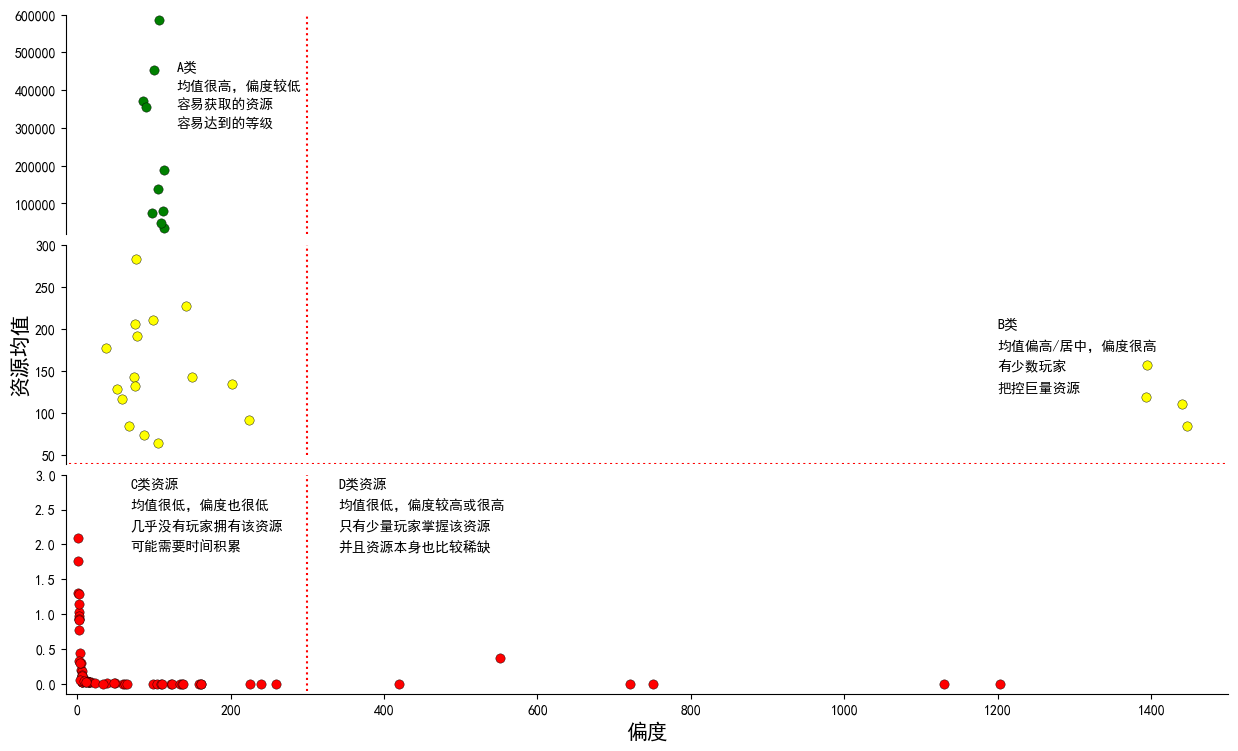

In [63]:
plt.figure(figsize=(15,9),dpi=100)
# 绘制三个纵坐标轴范围不一样的图像

# 上：20000-600000
plt.subplot(311)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "green"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500) #控制横纵坐标的范围
plt.ylim(20000, 600000)
plt.vlines(300, 20000, 600000,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.text(130,450000,s="A类")
plt.text(130,400000,s="均值很高，偏度较低")
plt.text(130,350000,s="容易获取的资源")
plt.text(130,300000,s="容易达到的等级")
plt.xticks([])

# 中：40-300
plt.subplot(312)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "yellow"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(40, 300)
plt.vlines(300, 50, 300,colors="red",linestyles="dotted")
plt.hlines(40,-10, 1500,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.ylabel("资源均值", fontsize=15)
plt.text(1200,200,s="B类")
plt.text(1200,175,s="均值偏高/居中，偏度很高")
plt.text(1200,150,s="有少数玩家")
plt.text(1200,125,s="把控巨量资源")
plt.xticks([])

# 下: 0-3
plt.subplot(313)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(-0.15, 3)
plt.vlines(300, -0.1, 5,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("偏度", fontsize=15)
plt.yticks(fontsize=10)
plt.text(70,2.8,s="C类资源")
plt.text(70,2.5,s="均值很低，偏度也很低")
plt.text(70,2.2,s="几乎没有玩家拥有该资源")
plt.text(70,1.9,s="可能需要时间积累")
plt.text(340,2.8,s="D类资源")
plt.text(340,2.5,s="均值很低，偏度较高或很高")
plt.text(340,2.2,s="只有少量玩家掌握该资源")
plt.text(340,1.9,s="并且资源本身也比较稀缺")
plt.subplots_adjust(hspace=0.05)
plt.show()

**查看四类资源分别有哪些，数量是否合理**

In [64]:
# A类
A = sak.loc[sak["均值"] > 3,:].loc[sak["偏度"]<300,:]
A

,特征,偏度,峰度,均值
0,木头获取数量,100.635,15449.582,454306.859
1,木头消耗数量,86.310,11367.448,369843.252
2,石头获取数量,113.794,18489.107,189778.774
3,石头消耗数量,105.043,15515.988,137607.363
4,象牙获取数量,112.636,17682.030,80756.230
5,象牙消耗数量,113.405,16974.594,36131.699
6,肉获取数量,106.645,17907.029,585515.505
7,肉消耗数量,89.403,13600.967,354810.206
8,魔法获取数量,97.762,14958.235,75389.535
9,魔法消耗数量,109.334,18322.774,47253.994


In [65]:
A.shape[0]

27

In [66]:
# B类
B = sak.loc[sak["均值"] > 3,:].loc[sak["偏度"]>300,:]
B.shape[0]

4

In [67]:
# C类 - 大量还未开发的资源 & 大量的等级 - 比较容易获得的资源
C = sak.loc[sak["均值"] < 3,:].loc[sak["偏度"]<300,:]
C.shape[0]

60

In [68]:
# D类 - 极度稀缺的资源
D = sak.loc[sak["均值"] < 3,:].loc[sak["偏度"]>300,:]
D.shape[0]

6

<div class="alert alert-block alert-success">
    
- ABCD四类资源数量分布情况：
    - A: 27
    - B: 4
    - C: 60
    - D: 6
- 总的来说，各类资源的配比数量还算合理。
    - 由B类资源不多，说明该游戏并不是只想服务氪金玩家，而是依然致力于为普通玩家提供较好的体验，所以大部分玩家应该不是因为新手体验差而退游的。
    - 但各类资源的获取量确实有较大差异，基础资源达百万级甚至亿级，可能会导致玩家获得感不足。
    - 从A类资源的分布来看，只有木头和肉这两种就基础资源的分布较为正常，其余都是严重左偏的，说明**“留存率低”是原因，“资源数据异常”是结果**。可能由于产品自身设计的逻辑不顺、获得感不足、UI、系统BUG、捞金感强等原因，导致了大部分用户在第一天就流失了。
</div>

#### 3.3 对战：分析氪金对于战力（游戏平衡性）的影响

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 过于强大的角色、技能和道具都会影响到游戏的平衡性。氪金带来的战斗优势设置合理吗，是否有影响到游戏的平衡性？
    
</div>

<div class="alert alert-block alert-success">
    
- 平衡性这个指标很复杂，可以从很多方面进行考虑。但在现有数据下，能考虑的只有胜率。
- 因此，我们可以分析氪金用户与不氪金用户的战力差异，从而判断氪金**(前7日)**对游戏平衡性的影响。
</div>

<div class="alert alert-block alert-success">
    
- 先看PVP
</div>

**查看氪金玩家的人均PVP次数**

In [69]:
data[data["付费金额"] !=0]["PVP次数"].mean()

25.193802939260117

**查看氪金玩家PVP胜率分布**

In [70]:
(data[data["付费金额"] !=0]["PVP胜利次数"]/data[data["付费金额"] !=0]["PVP次数"]).describe()

count   35755.000
mean        0.533
std         0.360
min         0.000
25%         0.200
50%         0.600
75%         0.865
max         1.000
dtype: float64

**查看氪金玩家中没有参加过PVP的玩家占比**

In [71]:
1 - 35755/data[data["付费金额"] !=0].shape[0]

0.1371654721397717

**查看氪金玩家主动发起PVP的概率**

In [72]:
(data[data["付费金额"] !=0]["主动发起PVP次数"]/data[data["付费金额"] !=0]["PVP次数"]).describe()

count   35755.000
mean        0.452
std         0.357
min         0.000
25%         0.000
50%         0.500
75%         0.783
max         1.000
dtype: float64

<div class="alert alert-block alert-success">
    
- 对于氪金玩家而言，人均PVP胜率是53%，可以接受但没有很大优势。
- count数少于7日总付费人数，说明部分玩家PVP次数为0，剔除了这部分玩家，有13%的玩家从不玩PVP。
- 对于氪金玩家，45%的PVP由他们主动发起。
</div>

**查看不氪金玩家的人均PVP次数**

In [73]:
data[data["付费金额"] == 0]["PVP次数"].mean()

1.723228497868749

**查看不氪金玩家PVP胜率分布**

In [74]:
(data[data["付费金额"] == 0]["PVP胜利次数"]/data[data["付费金额"] ==0]["PVP次数"]).describe()

count   539947.000
mean         0.254
std          0.355
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

**查看不氪金玩家中没有参加过PVP的玩家占比**

In [75]:
1 - 539947/data[data["付费金额"] ==0].shape[0]

0.7596569522934539

**查看不氪金玩家主动发起PVP的概率**

In [76]:
(data[data["付费金额"] ==0]["主动发起PVP次数"]/data[data["付费金额"] ==0]["PVP次数"]).describe()

count   539947.000
mean         0.262
std          0.365
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

<div class="alert alert-block alert-success">
    
- 对于非氪金玩家而言，人均PVP胜率只有25%，并且75%的人场均胜率不到50%，这个情况说明对于非付费玩家来说的确比较苛刻。
- 同样的，非氪金玩家中也有部分玩家的PVP次数为0，因此被剔除了，占比高达76%，但这些玩家有许多可能是已经流失的玩家，因此自然不会参加PVP对战。
- 对于非氪金玩家，只有26%的PVP由他们发起，且多数时候75%的玩家都不会发起对战。
</div>

<div class="alert alert-block alert-success">
    
- 再看看PVE
</div>

**查看氪金玩家的人均PVE次数**

In [77]:
data[data["付费金额"] !=0]["PVE次数"].mean()

40.949540288134365

**查看氪金玩家PVE胜率分布**

In [78]:
(data[data["付费金额"] !=0]["PVE胜利次数"]/data[data["付费金额"] !=0]["PVE次数"]).describe()

count   37389.000
mean        0.885
std         0.141
min         0.000
25%         0.840
50%         0.926
75%         0.988
max         1.000
dtype: float64

**查看氪金玩家中没有参加过PVE的玩家占比**

In [79]:
1 - 37389/data[data["付费金额"] !=0].shape[0]

0.09773401867805687

**查看氪金玩家主动发起PVE的概率**

In [80]:
(data[data["付费金额"] !=0]["主动发起PVE次数"]/data[data["付费金额"] !=0]["PVE次数"]).describe()

count   37389.000
mean        0.991
std         0.067
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
dtype: float64

<div class="alert alert-block alert-success">
    
- 对于氪金玩家而言，人均PVE胜率是89%。
- 有10%的玩家从不玩PVE。
- 对于氪金玩家，99%的PVE由他们主动发起。
</div>

**查看不氪金玩家的人均PVE次数**

In [81]:
data[data["付费金额"] == 0]["PVE次数"].mean()

2.141877299062392

**查看不氪金玩家PVE胜率分布**

In [82]:
(data[data["付费金额"] == 0]["PVE胜利次数"]/data[data["付费金额"] ==0]["PVE次数"]).describe()

count   703148.000
mean         0.921
std          0.179
min          0.000
25%          0.965
50%          1.000
75%          1.000
max          1.000
dtype: float64

**查看不氪金玩家中没有参加过PVE的玩家占比**

In [83]:
1 - 703148/data[data["付费金额"] ==0].shape[0]

0.6870123673087127

**查看不氪金玩家主动发起PVE的概率**

In [84]:
(data[data["付费金额"] ==0]["主动发起PVE次数"]/data[data["付费金额"] ==0]["PVE次数"]).describe()

count   703148.000
mean         0.996
std          0.056
min          0.000
25%          1.000
50%          1.000
75%          1.000
max          1.000
dtype: float64

<div class="alert alert-block alert-success">
    
- 对于非氪金玩家而言，人均PVE胜率为92%，超过了氪金玩家的89%。
- 有69%的玩家从不玩PVE。
- 对于非氪金玩家，也有99%的PVE由他们主动发起，和氪金玩家一样。
</div>

<div class="alert alert-block alert-success">
    
- 对于PVE，不氪金玩家胜率（92%）甚至超过氪金玩家胜率（89%），说明环境怪兽比较弱小，大部分玩家都能轻松战胜。
- 当在PVP上氪金玩家有绝对优势时，不氪金玩家会更倾向选择在PVE环境中进行战斗。
- 但基于无论氪不氪金玩家近乎所有人都主动发起PVE的事实，说明PVE可能是必须的环节（如收集资源等）。
- 综上，氪金并不会对PVE有影响，主要是影响PVP，《野蛮时代》的PVP设定可以夺取其他玩家资源，因此PVP对游戏的平衡性有很大影响（即对玩家流失有重要影响）。非氪金用户可能会因为PVP胜率太低而逐渐离开。

</div>

#### 3.4 异常：分析高度左偏数据

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 特征高度左偏说明存在大量异常值，可能代表着部分特殊人群（异常玩家），因此需要对这部分异常数据进行分析，确定如何进行处理。
    
</div>

<div class="alert alert-block alert-success">
    
- 先来看看业务上的异常值
    - 资源/人物等级/胜利次数/金额等不应出现负数。
    - 用户信息中的年龄不应为负，或过高过低。
    - 在线时长很短，但资源量很丰富，可能是管理员，也有可能是作弊。
</div>

In [85]:
# 不对ID，注册时间和标签（45日付费金额）计算异常值
AbnormalCheck = data.iloc[:,2:-1]

In [86]:
# 确认已没有任何object对象
AbnormalCheck.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 106 entries, 木头获取数量 to 付费次数
dtypes: float64(12), int64(94)
memory usage: 1.8 GB


In [87]:
# 无小于0的值
(AbnormalCheck < 0).sum().sum()

0

In [88]:
# 通常我们还会检查在线时间很短但却拥有很多资源的账号，可能是作弊账号
# 但以目前游戏1分钟积累4w资源、3分钟积累十几万资源的状况来看，很难去判断资源出现异常的“阈值”
AbnormalCheck.loc[AbnormalCheck["在线时长"] < 30,:]

字段解释,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,魔法消耗数量,...,科研：资源帮助容量,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数
0,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,1.167,0.000,0
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,3.167,0.000,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,2.333,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288002,15500.000,3700.000,0.000,0.000,0.000,0.000,13000.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.500,0.000,0
2288003,10000.000,0.000,0.000,0.000,0.000,0.000,10000.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.833,0.000,0
2288004,131589.000,71287.000,0.000,0.000,6000.000,0.000,249356.000,39524.000,0.000,0.000,...,0,0,0,0,2,2,2,4.333,0.000,0
2288005,221984.000,122401.000,0.000,0.000,0.000,0.000,208184.000,74738.000,0.000,0.000,...,0,0,0,0,1,1,1,2.833,0.000,0


<div class="alert alert-block alert-success">
    
- 再来看看统计上的异常值
    - 通常使用箱线图，但箱线图函数无法处理百万级比数据，因此使用计算方式。
        - 但由于箱线图规则比较严格，在极度左偏数据下可能会刷掉大量数据，这些被刷掉的异常数据一定是出现在高于上分位数的方向，也就是玩家资源过多/等级过高时会被判断为异常。但这部分玩家也是游戏整体参与度较高的玩家，即很有可能是氪金用户。
    - 3sigma法则，规则比较宽松。但数据应满足正态分布，这一点与现有数据不太相符。
</div>

**查看使用箱线图筛选的异常玩家，及他们的在线时长/氪金情况**

In [89]:
# 打印异常比例，保存异常样本的索引
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
#列表：用于保存我们的异常值的索引
BoxAbnormalIdx = [] 
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)
    abnormal.loc[idx,"特征"] = column
    abnormal.loc[idx,"异常值数量"] = error.shape[0]
    abnormal.loc[idx,"异常值比例"] = "{:.3f}%".format(error.shape[0]*100/NumOfSamples)

In [90]:
# 利用集合对筛选出的异常值的索引进行去重
BoxAbnormalIdx = set(BoxAbnormalIdx)
# 查看异常值数量
len(BoxAbnormalIdx)

1123706

In [91]:
# 左偏比较严重的特征异常值更多
abnormal.sort_values("异常值比例",ascending=False)

,特征,异常值数量,异常值比例
39,建筑：联盟大厅等级,215420.000,9.415%
15,萨满损失数量,207173.000,9.055%
26,科研加速获取数量,195901.000,8.562%
20,萨满伤兵产生数量,183496.000,8.020%
84,科研：据点耐久,162146.000,7.087%
43,建筑：战争大厅等级,160448.000,7.013%
70,科研：建造速度,147491.000,6.446%
14,萨满招募数量,146429.000,6.400%
47,建筑：冒险传送门等级,145062.000,6.340%
17,勇士伤兵恢复数量,131702.000,5.756%


<div class="alert alert-block alert-success">
    
- 超过100w数据都被归为异常，数量太多无法直接删除，并且在7日内付费的用户只有4w多，很可能就在这100多万数据内。
</div>

In [92]:
# 箱线图筛选出的异常玩家的在线时长
data.loc[BoxAbnormalIdx,"在线时长"].describe() 

count   1123706.000
mean         19.579
std          53.996
min           0.000
25%           2.333
50%           4.500
75%          11.667
max        2049.667
Name: 在线时长, dtype: float64

In [93]:
# 箱线图筛选出的异常玩家的7日付费用户数量
(data.loc[BoxAbnormalIdx,"付费金额"] != 0).sum() 

41439

In [94]:
# 所有7日付费用户数
(data.loc[:,"付费金额"] != 0).sum() 

41439

In [95]:
# 箱线图筛选出的异常玩家的45日付费用户数量
(data.loc[BoxAbnormalIdx,"45日付费金额"] != 0).sum() 

45670

In [96]:
# 所有45日付费用户数
(data.loc[:,"45日付费金额"] != 0).sum() 

45988

<div class="alert alert-block alert-success">
    
- 由上，付费用户100%被包含在了异常用户中，说明：
    - 付费用户的数据在现有数据的大背景下（大部分用户短时间快速流失）下，在统计上是完全异常的，因此建模时想要辨认出付费用户，模型会面对很高的过拟合风险，因此需要很深入的学习。
    - 异常用户有100w，但其中只有4w多付费用户，即许多不氪金用户和氪金用户在行为上有很高相似度，对于算法而言很难判断。
- 因此，算法建模需要使用更灵活的方式来处理这些异常值。
</div>

#### 3.5 注册时间：该唯一的object对象和氪金有关吗？

<div class="alert alert-block alert-warning">
 
**思考：**     
1. “注册时间”是全数据集中唯一一个object类型的对象，从常识来看应该与氪金行为关联不大，但以防万一还是可以看一下。
    
</div>

<div class="alert alert-block alert-success">
    
- 将注册时间分成日期和时刻，分别绘制横坐标为注册日期/注册时刻，纵坐标为该注册日期/该注册时刻用户氪金均值的关系图，来观察注册日期、注册时刻是否与氪金行为有关。
</div>

**注册日期 vs. 用户氪金均值**

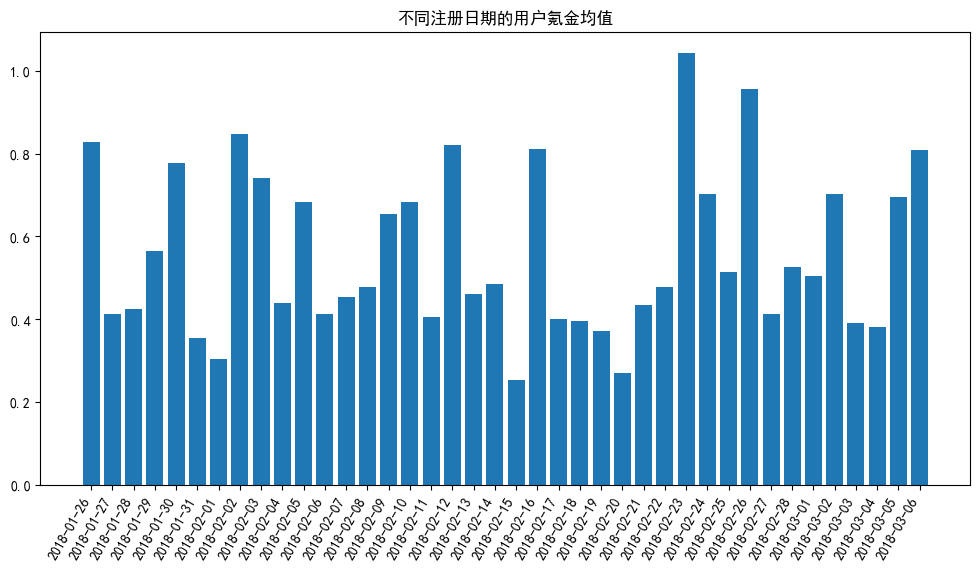

In [97]:
import time
import datetime

# 首先将玩家注册日期提取出来作为新的一列
RegisterDate = data.loc[:,"玩家注册时间"].apply(lambda x: x[:10])
# 按照玩家注册日期对付费金额进行聚合平均计算
RegisterDateMean = data["付费金额"].groupby(RegisterDate).mean()
# 绘制图像
plt.figure(figsize=(12,6),dpi=100)
plt.title("不同注册日期的用户氪金均值")
plt.bar(RegisterDateMean.index, RegisterDateMean.values)
plt.xticks(RegisterDateMean.index,rotation=60,ha="right");

<div class="alert alert-block alert-success">
    
- 由上图，看不出注册日期和氪金数额有什么联系，但每隔几天会有一个高峰，因此将日期转化为一星期中的某天，观察星期和用户氪金均值是否有关。
</div>

**注册时间（星期） vs. 用户氪金均值**

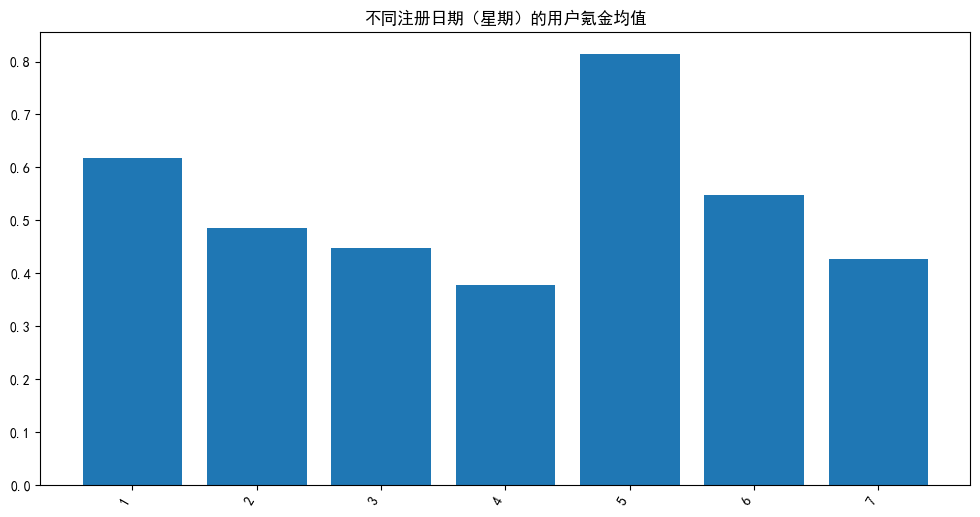

In [98]:
datetime.datetime.strptime(data.loc[0,"玩家注册时间"][:10],"%Y-%m-%d").weekday()
RegisterWeekday = data.loc[:,"玩家注册时间"].apply(lambda x: datetime.datetime.strptime(x[:10],"%Y-%m-%d").weekday()+1)
RegisterWeekDayMean = data["付费金额"].groupby(RegisterWeekday).mean()

plt.figure(figsize=(12,6),dpi=100)
plt.title("不同注册日期（星期）的用户氪金均值")
plt.bar(RegisterWeekDayMean.index, RegisterWeekDayMean.values)
plt.xticks(RegisterWeekDayMean.index,rotation=60,ha="right");

<div class="alert alert-block alert-success">
    
- 由上图，每周一和周五会出现高峰，在高峰后会逐渐下降，猜想：
    - 可能是跟投放策略（渠道/节奏）、游戏买量有关，如每周一、五都会排到更高质量的渠道，周五玩家准备过周末，周一玩家还不愿投入工作等。无论什么原因，可以查看一下星期与45日付费金额的相关系数。
</div>

In [99]:
# 几乎不相关，因此不用将星期放入特征矩阵了。
pd.concat([data["45日付费金额"],RegisterWeekday],axis=1).corr()

,45日付费金额,玩家注册时间
45日付费金额,1.000,0.000
玩家注册时间,0.000,1.000


**注册时刻 vs. 用户氪金均值**

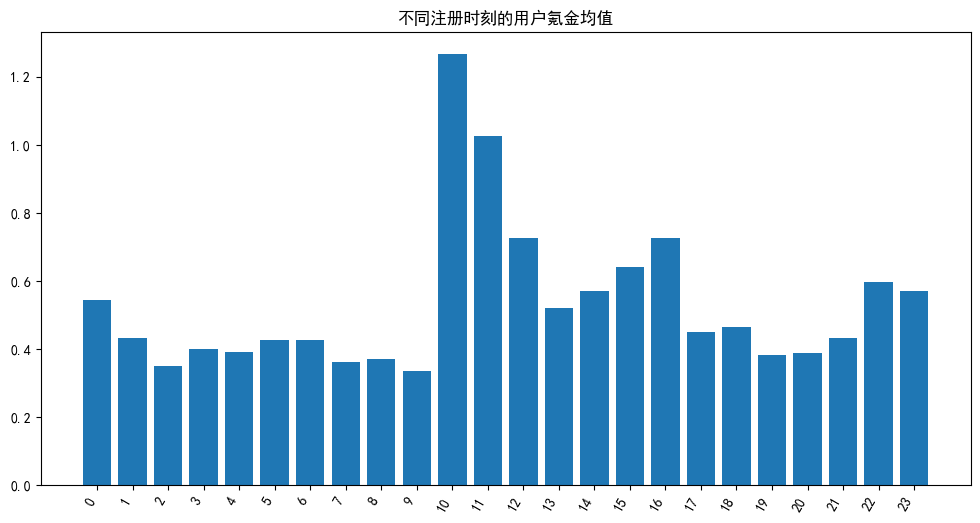

In [100]:
# 将时刻也单独列一列，提取小时数作为特征
RegisterTime = data.loc[:,"玩家注册时间"].apply(lambda x: int(x[11:13]))
# 按玩家注册时刻进行聚合，求均值
RegisterTimeMean = data["付费金额"].groupby(RegisterTime).mean()
#绘制图像
plt.figure(figsize=(12,6),dpi=100)
plt.title("不同注册时刻的用户氪金均值")
plt.bar(RegisterTimeMean.index, RegisterTimeMean.values)
plt.xticks(RegisterTimeMean.index,rotation=60,ha="right");

<div class="alert alert-block alert-success">
    
- 由上图，上午10点-12点及下午4点注册的用户比其他时间段的注册用户有更高的氪金可能性，猜想可能和推广渠道有关，也有可能的确和时刻有关，结合真实场景，这些时间段确实是上班摸鱼的时间，如果可以确定这些时间段推广的渠道，就能够确定用户画像，从而判断是否真的与时刻相关了。
- 同样的，可以查看一下时刻和45日付费金额的相关系数。
    
</div>

In [101]:
# 有非常微弱的关系，放不放都行，这里选择放进特征矩阵。
pd.concat([data["45日付费金额"],RegisterTime],axis=1).corr()

,45日付费金额,玩家注册时间
45日付费金额,1.000,0.001
玩家注册时间,0.001,1.000


**添加‘注册时刻’特征，删除原有‘玩家注册时间’特征**

In [102]:
data.insert(data.shape[1]-1,"玩家注册时刻",RegisterTime)

In [103]:
data.drop(columns=["玩家注册时间","玩家唯一ID"],inplace=True)

In [104]:
data.columns

Index(['木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量', '象牙消耗数量', '肉获取数量',
       '肉消耗数量', '魔法获取数量', '魔法消耗数量',
       ...
       '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数', 'PVE胜利次数', '在线时长', '付费金额',
       '付费次数', '玩家注册时刻', '45日付费金额'],
      dtype='object', name='字段解释', length=108)

## 二、模型搭建：实现用户付费行为预测

In [105]:
data.head()

字段解释,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,魔法消耗数量,...,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,玩家注册时刻,45日付费金额
0,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,0.000,0.000,...,0,0,0,0,0,0.333,0.000,0,19,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0.333,0.000,0,0,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,1.167,0.000,0,0,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,3.167,0.000,0,0,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,2.333,0.000,0,0,0.000


### 1. 模型选择与benchmark

In [106]:
# 将标签提取出来，分割标签与特征
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [107]:
X.shape

(2288007, 107)

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 经测试，200w数据在100棵树的随机森林上跑一次大约需要半小时，在100棵树的XGBoost上跑一次大约需要40分钟。时间有点长，不利于优化。
    
</div>

<div class="alert alert-block alert-success">
    
- 因此，在现有200w数据量下，应首先考虑简单快速的线性模型：线性回归。
    
</div>

**建立benchmark**

In [108]:
from sklearn.linear_model import LinearRegression as LR #线性回归
from sklearn.model_selection import train_test_split as TTS #分割训练集与测试集的类
from sklearn.metrics import mean_squared_error as MSE #模型评估指标

In [109]:
# 数据分割
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=0)
# 分割完毕后需要恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [110]:
# 实例化
reg = LR()
# 训练
reg_benchmark = reg.fit(Xtrain,Ytrain) 

In [111]:
# 训练集上的分数 - R2
reg_benchmark.score(Xtrain,Ytrain)

0.568654493134717

In [112]:
# 测试集上的分数 - R2
reg_benchmark.score(Xtest,Ytest) 

0.5553623776589194

In [113]:
# 测试集上的预测标签
y_pred = reg_benchmark.predict(Xtest) 

In [114]:
# 根均方误差(RMSE)
np.sqrt(MSE(Ytest,y_pred)) 

61.25768345547186

<div class="alert alert-block alert-success">
    
- 线性回归模型处于欠拟合状态，无论是在训练集还是测试集上的分数都不高，且两者分数相似，说明简单的线性回归模型在学习能力上不足。
- 此时benchmark的R2是55.5%，RMSE是61。
    
</div>

**尝试使用其他模型（在有限条件下）**

<div class="alert alert-block alert-success">
    
- 尝试随机森林
</div>

In [115]:
from sklearn.ensemble import RandomForestRegressor as RFR
# 给出非常少的树的数量，以及限制每次分枝所使用的最大特征量
reg_tree = RFR(n_estimators=10,max_features=5) 
reg_tree.fit(Xtrain,Ytrain)

RandomForestRegressor(max_features=5, n_estimators=10)

In [116]:
# 训练集上的R2是89%
reg_tree.score(Xtrain,Ytrain) 

0.9015340295457145

In [117]:
# 测试集上的R2是43%
reg_tree.score(Xtest,Ytest) 

0.4492750891295073

In [118]:
# 测试集上的预测标签
y_pred = reg_tree.predict(Xtest)

In [119]:
np.sqrt(MSE(Ytest,y_pred))

68.17494973999948

<div class="alert alert-block alert-success">
    
- 随机森林模型处于过拟合状态，可以尝试进行调参。
- 此时benchmark的R2是43%，RMSE是70。
- 经测试，通过增大树的数量或控制最大深度，模型的RMSE都很高。
</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 初步尝试线性模型和树型模型后，发现两者表现差不多且结果并不好，说明数据本身的学习难度较大。
2. 观察结果，线性回归模型的表现更好，接下来怎么做呢？
    
</div>

<div class="alert alert-block alert-success">
    
- 如果建立benchmark的时候发现最佳模型就是线性回归，那基本就没有任何可以调整的余地了，因为线性回归几乎没有可以调参的地方。
- 因此根据经验，处理这样的数据要么花大量精力做特征工程，要么用神经网络建模。但无论如何，要先降低数据集的RMSE。
</div>

### 2. 特征工程（1）：基于业务模式构建特征

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 特征构建常用方法：
    - 特征之间加减乘除
    - 对特征进行简单的数学运算（绝对值，取对数）
    - 对特征进行逻辑运算（and，or，交集，并集，最大最小值）
    - 对特征进行聚合运算（按照离散特征聚合后取中位数、均值、众数、标准差、方差、频数）
    - 对特征使用多项式拓展方法（及特征与自身、与其他特征相乘）
    - 对连续特征进行分箱
    - 对离散特征进行独热编码
2. 如何结合业务模式来构建新特征呢？
</div>

<div class="alert alert-block alert-success">
    
- 基于业务模式，可构建的特征有：
    - **个人PVP胜率** = PVP胜利次数/PVP次数，无PVP的用户胜率为0
    - **主动发起PVP的概率** = 主动发起PVP次数/PVP次数，无PVP的用户主动发起概率为0
    - **玩家发育效率** = 平均资源获取数/在线时长（该指标高的人大概率擅长游戏）
    - **玩家升级效率** = 技能的平均等级/在线时长
    - **氪金发育效率** = 平均资源获取数/7日付费金额（该指标高的人大概率善用氪金资源）
    - **氪金升级效率** = 技能的平均等级/7日付费金额
</div>

**区分特征哪些是技能，哪些是资源**

In [120]:
X.columns.tolist()

['木头获取数量',
 '木头消耗数量',
 '石头获取数量',
 '石头消耗数量',
 '象牙获取数量',
 '象牙消耗数量',
 '肉获取数量',
 '肉消耗数量',
 '魔法获取数量',
 '魔法消耗数量',
 '勇士招募数量',
 '勇士损失数量',
 '驯兽师招募数量',
 '驯兽师损失数量',
 '萨满招募数量',
 '萨满损失数量',
 '勇士伤兵产生数量',
 '勇士伤兵恢复数量',
 '驯兽师伤兵产生数量',
 '驯兽师伤兵恢复数量',
 '萨满伤兵产生数量',
 '萨满伤兵恢复数量',
 '通用加速获取数量',
 '通用加速使用数量',
 '建筑加速获取数量',
 '建筑加速使用数量',
 '科研加速获取数量',
 '科研加速使用数量',
 '训练加速获取数量',
 '训练加速使用数量',
 '治疗加速获取数量',
 '治疗加速使用数量',
 '建筑：士兵小屋等级',
 '建筑：治疗小井等级',
 '建筑：要塞等级',
 '建筑：据点传送门等级',
 '建筑：兵营等级',
 '建筑：治疗之泉等级',
 '建筑：智慧神庙等级',
 '建筑：联盟大厅等级',
 '建筑：仓库等级',
 '建筑：瞭望塔等级',
 '建筑：魔法幸运树等级',
 '建筑：战争大厅等级',
 '建筑：联盟货车等级',
 '建筑：占卜台等级',
 '建筑：祭坛等级',
 '建筑：冒险传送门等级',
 '科研：侦查等级',
 '科研：训练速度等级',
 '科研：守护者',
 '科研：巨兽驯兽师',
 '科研：吟唱者',
 '科研：勇士攻击',
 '科研：驯兽师攻击',
 '科研：萨满攻击',
 '科研：战斗大师',
 '科研：高阶巨兽骑兵',
 '科研：图腾大师',
 '科研：部队防御',
 '科研：勇士防御',
 '科研：驯兽师防御',
 '科研：萨满防御',
 '科研：勇士生命',
 '科研：驯兽师生命',
 '科研：萨满生命',
 '科研：狂战士',
 '科研：龙骑兵',
 '科研：神谕者',
 '科研：部队攻击',
 '科研：建造速度',
 '科研：资源保护',
 '科研：部队消耗',
 '科研：木材生产',
 '科研：石头生产',
 '科研：象牙生产',
 '科研：肉类生产',
 '科研：木材采集',
 '科研：石头采集',
 '科研：象牙采集',
 '科研：肉类采集'

In [121]:
# 发育 - 关于资源的部分
GrowthFeature = []
for i in X.columns:
    if "招募" in i:
        GrowthFeature.append(i)
    elif "获取" in i:
        GrowthFeature.append(i)

In [122]:
GrowthFeature

['木头获取数量',
 '石头获取数量',
 '象牙获取数量',
 '肉获取数量',
 '魔法获取数量',
 '勇士招募数量',
 '驯兽师招募数量',
 '萨满招募数量',
 '通用加速获取数量',
 '建筑加速获取数量',
 '科研加速获取数量',
 '训练加速获取数量',
 '治疗加速获取数量']

In [123]:
# 等级 - 关于技能的部分
LevelUpFeature = []
for i in X.columns:
    if "建筑" in i:
        LevelUpFeature.append(i)
    elif "科研" in i:
        LevelUpFeature.append(i)

In [124]:
LevelUpFeature

['建筑加速获取数量',
 '建筑加速使用数量',
 '科研加速获取数量',
 '科研加速使用数量',
 '建筑：士兵小屋等级',
 '建筑：治疗小井等级',
 '建筑：要塞等级',
 '建筑：据点传送门等级',
 '建筑：兵营等级',
 '建筑：治疗之泉等级',
 '建筑：智慧神庙等级',
 '建筑：联盟大厅等级',
 '建筑：仓库等级',
 '建筑：瞭望塔等级',
 '建筑：魔法幸运树等级',
 '建筑：战争大厅等级',
 '建筑：联盟货车等级',
 '建筑：占卜台等级',
 '建筑：祭坛等级',
 '建筑：冒险传送门等级',
 '科研：侦查等级',
 '科研：训练速度等级',
 '科研：守护者',
 '科研：巨兽驯兽师',
 '科研：吟唱者',
 '科研：勇士攻击',
 '科研：驯兽师攻击',
 '科研：萨满攻击',
 '科研：战斗大师',
 '科研：高阶巨兽骑兵',
 '科研：图腾大师',
 '科研：部队防御',
 '科研：勇士防御',
 '科研：驯兽师防御',
 '科研：萨满防御',
 '科研：勇士生命',
 '科研：驯兽师生命',
 '科研：萨满生命',
 '科研：狂战士',
 '科研：龙骑兵',
 '科研：神谕者',
 '科研：部队攻击',
 '科研：建造速度',
 '科研：资源保护',
 '科研：部队消耗',
 '科研：木材生产',
 '科研：石头生产',
 '科研：象牙生产',
 '科研：肉类生产',
 '科研：木材采集',
 '科研：石头采集',
 '科研：象牙采集',
 '科研：肉类采集',
 '科研：部队负重',
 '科研：魔法采集',
 '科研：魔法生产',
 '科研：据点耐久',
 '科研：据点二',
 '科研：医院容量',
 '科研：领土采集奖励',
 '科研：治疗速度',
 '科研：据点三',
 '科研：联盟行军速度',
 '科研：战斗行军速度',
 '科研：采集行军速度',
 '科研：据点四',
 '科研：增援部队容量',
 '科研：行军大小',
 '科研：资源帮助容量']

**构建新特征**

In [125]:
X["PVP胜率"] = X["PVP胜利次数"]/X["PVP次数"]
X["主动发起PVP的概率"] = X["主动发起PVP次数"]/X["PVP次数"]
X["玩家发育效率"] = X.loc[:,GrowthFeature].mean(axis=1)/X["在线时长"]
X["氪金发育效率"] = X.loc[:,GrowthFeature].mean(axis=1)/X["付费金额"]
X["玩家升级效率"] = X.loc[:,LevelUpFeature].mean(axis=1)/X["在线时长"]
X["氪金升级效率"] = X.loc[:,LevelUpFeature].mean(axis=1)/X["付费金额"]

In [126]:
# 空值错误
X["PVP胜率"].isnull().sum()

1712305

In [127]:
# 极值错误
X["氪金发育效率"].describe()

count   1665563.000
mean            inf
std             NaN
min           0.000
25%             NaN
50%             NaN
75%             NaN
max             inf
Name: 氪金发育效率, dtype: float64

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 使用除法时，一定要查看除0错误与极值错误（分子特别大或分母特别小）。
2. 这里为什么会出现空值和极值的问题？如何解决？
</div>

<div class="alert alert-block alert-success">
    
- 有许多PVP次数为0的用户，因此在进行除法计算时会形成空值，应使用0进行覆盖。
- 分子过大或分母过小会形成inf，这时需要判断是哪一种情况。
    - 虽然有些分子的确较大，但是大部分分母都是个位数或很小，因此根本原因还是因为很多氪金数额过小（分母过小），而不是因为分子过高。
    - 因此针对以上情况，使用0进行覆盖。
- 综上两种问题，都可以用0进行覆盖。
</div>

**处理空值错误和极值错误**

In [128]:
for newfeature in ["PVP胜率","主动发起PVP的概率","玩家发育效率","玩家升级效率","氪金发育效率","氪金升级效率"]:
    X.loc[X[newfeature].isnull(),newfeature] = 0
    X.loc[X[newfeature] == float("inf"), newfeature] = 0

In [129]:
X["玩家发育效率"].isnull().sum()

0

In [130]:
(X["氪金发育效率"] == float("inf")).sum()

0

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 基于对游戏付费状况分析得出的用户价值的结论：
    - 分析营收状况时，我们发现如果**用户7日内付费超过6元**，则他/她在7日后继续付费的概率大于不再付费的概率，是高价值用户。
    - 分析用户在线时间时，当**用户的7日在线时长在20~800分钟**的用户对氪金金额的贡献率较高，是高价值用户。
    - 在分析资源获取难度与新手友好程度时，**初始资源（木头）获取数量很低的用户**是低价值用户。
    - 分析对战状况与游戏平衡性时，**主动发起PVP概率大于50%**的用户贡献了较多氪金金额，是高价值用户。
    - 在分析异常值时，异常用户覆盖了全部氪金用户，因为氪金用户的资源量往往都很大。但是不氪金的用户中也有许多拥有大量资源，是肝帝。因此，**资源类巨大（异常）但7日内没有付费**的用户是低价值用户。
2. 如何根据以上结论，对用户进行分类？
</div>

<div class="alert alert-block alert-success">
    
- 基于以上结论，可以将用户划分成低价值用户（0）和高价值用户（1）两大类，再根据具体条件再进行细分并创造新特征：
    - 高价值玩家：
        - 潜力玩家：7日内付费超过6元
        - 好战玩家：主动发起PVP概率大于50%
    - 低价值玩家：
        - 佛系玩家： 主动发起PVP概率小于20%，或一次都没有参加过PVP
        - 肝帝玩家： 7日在线时间过长或资源量巨大，但7日内也没有付费
        - 菜鸡玩家： 参加过PVP且个人PVP胜率小于10%
        - 流失玩家： 7日在线时间过短或初始资源获取量小于10000
</div>

In [131]:
# 高价值玩家，符合条件的被标注为1
X["潜力玩家"] = (X["付费金额"] >= 5.98).astype(int)
X["好战玩家"] = (X["主动发起PVP的概率"] >= 0.5).astype(int)

# 低价值玩家，符合条件的被标注为0
X["肝帝玩家"] = (X["在线时长"] > 800).apply(lambda x: not x).astype(int)
X["佛系玩家"] = ((X["主动发起PVP的概率"] < 0.2) | (X["PVP次数"] == 0)).apply(lambda x: not x).astype(int)
X["菜鸡玩家"] = ((X["PVP胜率"]< 0.1) & (X["PVP次数"] != 0)).apply(lambda x: not x).astype(int)
X["流失玩家"] = ((X["在线时长"] <= 15) | (X["木头获取数量"] <= 10000)).apply(lambda x: not x).astype(int)

In [132]:
X.isnull().sum().sum()

0

In [133]:
X.head()

字段解释,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,魔法消耗数量,...,玩家发育效率,氪金发育效率,玩家升级效率,氪金升级效率,潜力玩家,好战玩家,肝帝玩家,佛系玩家,菜鸡玩家,流失玩家
0,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,0.000,0.000,...,8446.162,0.000,2.261,0.000,0,0,1,0,1,0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0,0,1,0,1,0
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0,0,1,0,1,0
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0,0,1,0,1,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0,0,1,0,1,0


### 3. 特征工程（2）：达成建模所需的统计假设

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 为了数据能够有效再线性回归中运行，需要尽力避免异常值、左偏分布等影响。因此，需要对训练集做哪些预处理呢？
</div>

<div class="alert alert-block alert-success">
    
- 可以进行以下预处理：
    - **相关性分析**：删除与标签相关性很小的特征，并观察哪些特征与标签有关联。
    - **训练/测试比例调优**：调整训练集测试集比例，找出最佳的test_size超参数。
    - **异常值处理**： 按照箱线图的规则，对异常值中7日内没有氪金的玩家进行中位数覆盖处理，对于7日内有氪金的玩家不处理。
    - **数据归一化**：为了排除量纲不统一带来的问题，同时加速计算速度。
</div>

#### 3.1 相关性分析：筛选特征/特征重要性

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 现在有118个特征，每条特征有220w条数据，如果直接用corr()函数对所有特征计算会十分缓慢，怎么解决？
</div>

<div class="alert alert-block alert-success">
    
- 只考虑特征与标签之间的相关性，不考虑特征与特征之间的相关性，然后根据相关系数筛选特征。
</div>

In [134]:
# 构建空的DataFrame
corr_list = pd.DataFrame()

In [135]:
for idx, column in enumerate(X.columns):
    # 计算该列与标签的相关系数
    corr_ = pd.concat([y,X.loc[:,column]],axis=1).corr().iloc[0,1]
    corr_list.loc[idx,"特征"] = column
    corr_list.loc[idx,"相关系数"] = corr_

**根据相关系数从大到小排序特征**

In [136]:
corr_list.sort_values("相关系数",ascending=False)

,特征,相关系数
104,付费金额,0.735
4,象牙获取数量,0.658
2,石头获取数量,0.648
5,象牙消耗数量,0.641
0,木头获取数量,0.640
22,通用加速获取数量,0.633
3,石头消耗数量,0.631
28,训练加速获取数量,0.621
1,木头消耗数量,0.619
6,肉获取数量,0.608


**设定相关系数阈值为0.01，查看低于阈值的特征**

In [137]:
# 只有两个特征低于阈值，考虑保留下来。
corr_list[abs(corr_list["相关系数"]) < 0.01]

,特征,相关系数
106,玩家注册时刻,0.001
117,菜鸡玩家,0.006


#### 3.2 训练/测试集分割的调优

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 通常进行数据分割时，按训练集7，测试集3的比例进行分割。但考虑到线性回归是复杂度较低的模型，学习能力和抗过拟合能力有限，训练集过多或过少都很容易导致过拟合，如何尽量避免呢？
</div>

<div class="alert alert-block alert-success">
    
- 尝试多组分割比例，以确定最适合的训练集数量。
</div>

In [138]:
X.shape

(2288007, 119)

**相当于使用学习曲线对test_size进行调参**

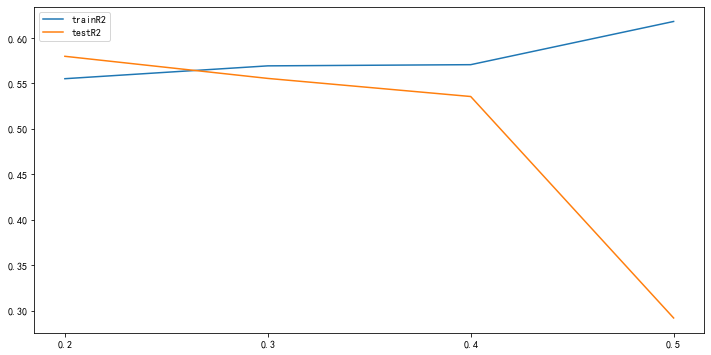

In [139]:
trainr2 = [] #训练集上的R2
testr2 = [] #测试集上的R2
testRMSE = [] #测试集上的RMSE
for i in [0.2,0.3,0.4,0.5]:
    Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=i,random_state=0)
    model = LR().fit(Xtrain,Ytrain)
    trainr2.append(model.score(Xtrain,Ytrain))
    testr2.append(model.score(Xtest,Ytest))
    testRMSE.append(np.sqrt(MSE(Ytest,model.predict(Xtest))))

plt.figure(figsize=(12,6))
plt.plot(trainr2,label="trainR2")
plt.plot(testr2,label="testR2")
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5])
plt.legend();

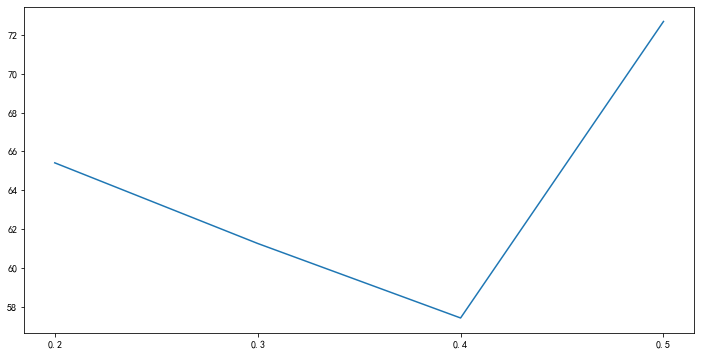

In [140]:
plt.figure(figsize=(12,6))
plt.plot(testRMSE)
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5]);

In [141]:
testRMSE

[65.40795069680448, 61.25139090319009, 57.41019044980113, 72.6957837042541]

<div class="alert alert-block alert-success">
    
- 根据以上结果，在测试集上RMSE最低的训练集数量是0.4，此时的R2表现出了过拟合的倾向，但不严重。
- 考虑到核心评估指标是RMSE，因此R2稍有问题，但RMSE明显有优势时，则以RMSE优先考虑。
- 因此，训练集数量设定为0.4
    
</div>

**按test_size=0.4划分数据集**

In [142]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.4,random_state=0)

In [143]:
Ytrain = pd.DataFrame(Ytrain)
Ytest = pd.DataFrame(Ytest)

Ytrain.index = Xtrain.index
Ytest.index = Xtest.index

In [144]:
Xtrain.head()

字段解释,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,魔法消耗数量,...,玩家发育效率,氪金发育效率,玩家升级效率,氪金升级效率,潜力玩家,好战玩家,肝帝玩家,佛系玩家,菜鸡玩家,流失玩家
1914412,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0,0,1,0,1,0
188838,26375.000,4200.000,0.000,0.000,0.000,0.000,32000.000,2250.000,0.000,0.000,...,8996.154,0.000,1.536,0.000,0,0,1,0,1,0
1879427,2063.000,1350.000,0.000,0.000,0.000,0.000,1531.000,675.000,0.000,0.000,...,184.308,0.000,0.010,0.000,0,0,1,0,1,0
1616849,56314.000,17460.000,0.000,0.000,0.000,0.000,76717.000,10850.000,0.000,0.000,...,12294.005,0.000,1.026,0.000,0,0,1,0,1,0
2046255,220125.000,3700.000,200000.000,0.000,200000.000,0.000,616375.000,2000.000,60000.000,0.000,...,299367.992,0.000,2.261,0.000,0,0,1,0,1,0


#### 3.3 异常值处理

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 在之前筛选异常值时，发现所有的氪金玩家都被包含在了异常玩家中（这与氪金玩家往往都是深度玩家有很大关系），因此不能对异常数据进行简单删除，并且由于数据高度左偏，异常值数量众多（超过100w），删掉近50%的数据也不可取。
2. 如何灵活处理这些异常值呢？
</div>

<div class="alert alert-block alert-success">
    
- 针对以上情况，可以对异常值进行类似盖帽的特殊处理：
    - 按箱线图规则筛选异常值
    - 对异常值中7日内无氪金的玩家进行中位数覆盖（效果不好的话改用0覆盖）
    - 对异常值中7日内有氪金的玩家不进行处理，尽量放大氪金玩家和非氪金玩家特征上的区别，为建模提供更好保障。
- **注**：异常值处理必须在训练集测试集被分割的情况下进行，因为测试集上的异常值处理是必须依赖【对训练集进行异常值处理所产生的中间变量】的
    
</div>

In [145]:
def AbnormalReplace(Xtrain,Xtest):
    Xtrain_ = Xtrain.copy()
    Xtest_ = Xtest.copy()
    for column in Xtrain_.columns:
        # 提取当前要检测的列
        f_train = Xtrain_.loc[:,column]
        f_test = Xtest_.loc[:,column]

        # 从训练集中计算出QL、QU、IQR、中位数
        QL = np.quantile(f_train,0.25)
        QU = np.quantile(f_train,0.75)
        IQR = QU - QL
        medium_ = f_train.median()
        
        # 对训练集和测试集同时进行检测，得到True/False列表
        errortrain = ((f_train < (QL - 1.5*IQR)).astype(int) + (f_train > (QU + 1.5*IQR)).astype(int)) != 0
        errortest = ((f_test < (QL - 1.5*IQR)).astype(int) + (f_test > (QU + 1.5*IQR)).astype(int)) != 0

        # 将原矩阵中的异常值替换为中位数，排除7日付费用户
        Xtrain_.loc[((Xtrain_["付费金额"]==0).values & errortrain.values),column] = 0 
        Xtest_.loc[((Xtest_["付费金额"]==0).values & errortest.values),column] = 0 
        
    return Xtrain_, Xtest_

In [146]:
# 为了保留原始的Xtrain和Xtest，新生成的值我们写作小写
xtrain, xtest = AbnormalReplace(Xtrain,Xtest) 

#### 3.4 归一化处理

In [147]:
# x - x.min() / x.max() - x.min()
from sklearn.preprocessing import MinMaxScaler
# 实例化
mm = MinMaxScaler(feature_range = [0,1])
# 训练 - 生成训练集上的最小值和最大值
mm = mm.fit(xtrain)
# 进行归一化
xtrain = mm.transform(xtrain)
xtest = mm.transform(xtest)

### 4. 模型融合：处理高度偏态数据带来的问题

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 由前面的异常值分析，存在大量不氪金用户和氪金用户在资源积累、游戏参与度上的行为极为相似的情况
2. 且氪金用户和不氪金用户各自的用户组成也都相对复杂：
    - 在氪金用户中，有闭眼氪的羊毛玩家，也有7日内未氪但7日后不知为何氪了一点的玩家...
    - 在不氪金用户中，有深度参与游戏但一分不氪的肝帝玩家，也有玩得很糟但不退游的玩家...
    - 因此在预测前就可以想象到，模型在用户辨别、金额预测上的效果不会太好。
3. 虽然已经对异常值进行了“盖帽”处理，并也增加了我们认为可以更好区分氪金与否的特征，但目前单一的线性模型直接对氪金金额预测是非常困难的，如何解决呢？
    
</div>

<div class="alert alert-block alert-success">
    
- 因此，我们可以先使用**逻辑回归**预测用户**是否会氪金**，再将“逻辑回归预测会氪金的用户”放入线性回归，最后让**线性回归**直接对这些“很可能会氪金的用户”的**氪金金额**进行预测。
</div>

#### 4.1 逻辑回归

**构建逻辑回归使用的标签y2**

In [148]:
# 逻辑回归的标签：氪金(1)与不氪金(0)，1类远远少于0类
y2 = (y != 0).astype(int)

In [149]:
# 45988 - 45天氪金用户数量
y2.value_counts()

0    2242019
1      45988
Name: 45日付费金额, dtype: int64

In [150]:
1 - 45988/y2.shape[0]

0.9799004111438471

**将逻辑回归的y2变成与线性回归使用的Xtrain、Xtest相匹配的y2train, y2test**

In [151]:
# 以Xtrain,Xtest的分割方式来分割y2，这样y2就是与Ytrain相匹配的
Ytrain2 = y2[Xtrain.index]
Ytest2 = y2[Xtest.index]

**使用逻辑回归进行建模并使用ROC进行评估**

In [152]:
from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.metrics import roc_auc_score as ROC #ROC
from sklearn.metrics import recall_score as Recall #召回
from sklearn.metrics import precision_score as Precision #精确度

# 逻辑回归的实例化
clf = LogiR(random_state=0)
# 训练，使用经过特征工程的特征矩阵xtrain
clf.fit(xtrain,Ytrain2) 

LogisticRegression(random_state=0)

In [153]:
# 逻辑回归在训练集上的准确率
clf.score(xtrain,Ytrain2) 

0.9968109067281272

In [154]:
# 逻辑回归在测试集上的准确率
clf.score(xtest,Ytest2) 

0.9968302114394293

In [155]:
# 测试集的拟合情况 - 逻辑回归在测试集上对每个样本预测的概率
y2_proba = clf.predict_proba(xtest)

In [156]:
y2_proba

array([[0.99491004, 0.00508996],
       [0.99814453, 0.00185547],
       [0.99821657, 0.00178343],
       ...,
       [0.99808111, 0.00191889],
       [0.99754953, 0.00245047],
       [0.99816508, 0.00183492]])

In [157]:
# 预测为1的概率：y2_proba[:,1]
# 此时ROC接近1越好，最糟糕的情况是接近0.5
ROC(Ytest2,y2_proba[:,1]) 

0.9710896542338872

<div class="alert alert-block alert-success">
    
- 逻辑回归结果出乎意料好，在样本如此不均衡的情况下ROC可以达到97%，说明数据很适配逻辑回归。
</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 在ROC结果很好的情况下，我们再分别看看Recall和Precision，能否再提升？
    
</div>

- RECALL：全部真实的1中，被预测正确的1所占的比例

![](http://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/week%208%20SVM%20%282%29/confusion%20matrix/Recall.PNG)

- PRECISION：全部被预测为1的值中，真实的1所占的比例

In [158]:
Recall(Ytest2,clf.predict(xtest))

0.8421310404875925

![](http://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/week%208%20SVM%20%282%29/confusion%20matrix/Precision.PNG)

In [159]:
Precision(Ytest2,clf.predict(xtest))

1.0

<div class="alert alert-block alert-success">
    
- 结合Recall和Precision的结果来看，所有被预测为1的值都预测正确了，但还是有部分被预测为0的用户真实值为1。

</div>

**预测为1类（付费用户）的数量**

In [160]:
(y2_proba[:,1] > 0.5).sum()

15475

**实际为1类（付费用户）的数量**

In [161]:
(Ytest != 0).sum()

45日付费金额    18376
dtype: int64

<div class="alert alert-block alert-success">
    
- 有许多氪金用户被逻辑回归分类到了不氪金那类，如果按照现在的结果建模，那RMSE的主要来源就是**没有被逻辑回归分类正确的氪金用户的付费金额 + 被逻辑回归分类正确的氪金用户在被线性回归预测后的付费金额差异（状况A）**
- 如果我们希望逻辑回归能尽可能找出所有真实氪金的用户，为此即便无上一些没有氪金的用户，那么就要提升Recall，此时的RMSE的主要来源就是**被逻辑回归误分类成氪金用户的非氪金用户在线性回归中的预测付费金额 + 全部真实氪金用户经过线性回归预测后的付费金额差异（状况B）**（注意该状况下需要线性回归预测的值会更多）

</div>

<div class="alert alert-block alert-warning">
 
**思考：**     
1. 状况A和状况B最终的RMSE我们现在是无法得知的，如何选择呢？
    
</div>

<div class="alert alert-block alert-success">
    
- 针对状况A，如果想要提升Recall，可以降低逻辑回归中用于分类的阈值（默认是0.5），需要手动改动。

</div>

In [162]:
# 当前逻辑回归预测的1类概率
prob = y2_proba[:,1]

# 在0~0.5中循环20个阈值备选数，会发现阈值越低，recall越高
for tol in np.linspace(0,0.5,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f} Recall:{:.3f}".format(tol,recall))

0.000 Recall:1.000
0.026 Recall:0.890
0.053 Recall:0.863
0.079 Recall:0.854
0.105 Recall:0.852
0.132 Recall:0.852
0.158 Recall:0.851
0.184 Recall:0.850
0.211 Recall:0.850
0.237 Recall:0.849
0.263 Recall:0.849
0.289 Recall:0.848
0.316 Recall:0.847
0.342 Recall:0.847
0.368 Recall:0.846
0.395 Recall:0.846
0.421 Recall:0.845
0.447 Recall:0.844
0.474 Recall:0.843
0.500 Recall:0.842


In [163]:
# 在0~0.026之间再选择一个更小的阈值
for tol in np.linspace(0,0.026,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f} Recall:{:.3f}".format(tol,recall))

0.000 Recall:1.000
0.001 Recall:0.995
0.003 Recall:0.958
0.004 Recall:0.938
0.005 Recall:0.927
0.007 Recall:0.921
0.008 Recall:0.915
0.010 Recall:0.911
0.011 Recall:0.907
0.012 Recall:0.904
0.014 Recall:0.902
0.015 Recall:0.901
0.016 Recall:0.899
0.018 Recall:0.898
0.019 Recall:0.897
0.021 Recall:0.895
0.022 Recall:0.895
0.023 Recall:0.894
0.025 Recall:0.892
0.026 Recall:0.890


<div class="alert alert-block alert-success">
    
- 在多次试验后，**阈值0.02**是一个合适的值。

</div>

In [164]:
tol_ = 0.02

In [165]:
# 在0.02阈值下，逻辑回归预测了测试集中的多少样本为1
(y2_proba[:,1] >= tol_).sum()

31388

In [166]:
# 训练集中的多少样本被预测为1
(clf.predict_proba(xtrain)[:,1] >= tol_).sum()

47027

**保存逻辑回归按阈值0.02时的预测结果**

In [167]:
# 对于所有不氪金的样本而言，预测已经到此结束了 - 标签y为0
# 测试集，千万别忘记将Xtest的索引导入
result = pd.DataFrame(y2_proba[:,1],index=Xtest.index)
result.columns = ["logi_proba"]
result["logi_y_pred"] = (result["logi_proba"] >= tol_).astype(int)

In [168]:
# 训练集，索引同样需要导入
logi_train_result = pd.DataFrame(clf.predict_proba(xtrain)[:,1],index=Xtrain.index)
logi_train_result.columns = ["logi_train_proba"]
logi_train_result["logi_y_pred_train"] = (logi_train_result["logi_train_proba"] >= tol_).astype(int)

In [169]:
logi_train_result.head()

,logi_train_proba,logi_y_pred_train
1914412,0.002,0
188838,0.002,0
1879427,0.002,0
1616849,0.002,0
2046255,0.002,0


#### 4.2 线性回归

**选出应该放入线性回归中的训练集与测试集（1类）**

In [170]:
# 训练集：逻辑回归的预测标签为1的部分
xtrain_linear_reg = xtrain[logi_train_result["logi_y_pred_train"] == 1]
ytrain_linear_reg = Ytrain[logi_train_result["logi_y_pred_train"] == 1]

In [171]:
#确认与训练集中被预测为1的样本数一致
xtrain_linear_reg.shape 

(47027, 119)

In [172]:
#测试集
xtest_linear_reg = xtest[result["logi_y_pred"] == 1]
ytest_linear_reg = Ytest[result["logi_y_pred"] == 1]

In [173]:
xtest_linear_reg.shape

(31388, 119)

**开始进行回归预测**

In [174]:
def reg_predict(model):
    # 训练
    reg = model.fit(xtrain_linear_reg, ytrain_linear_reg) 
    # 对测试集进行预测
    y_linear_pred = reg.predict(xtest_linear_reg) 
    print("训练集R2:{:.3f}".format(reg.score(xtrain_linear_reg, ytrain_linear_reg)))
    print("测试集R2:{:.3f}".format(reg.score(xtest_linear_reg, ytest_linear_reg)))
    print("测试集RMSE:{:.3f}".format(np.sqrt(MSE(ytest_linear_reg,y_linear_pred))))
    # 融合模型预测出的结果中的 - 回归部分
    return y_linear_pred 

**线性回归**

In [175]:
reg0 = LR()
y_linear_pred0 = reg_predict(reg0) 

训练集R2:0.581
测试集R2:0.537
测试集RMSE:306.214


**梯度提升回归**

In [176]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
reg2 = GBR(n_estimators=100,max_depth=2,max_features=20,random_state=0)
y_linear_pred2 = reg_predict(reg2)

训练集R2:0.742
测试集R2:0.505
测试集RMSE:316.577


### 5. 模型调优

In [177]:
reg2 = GBR(n_estimators = 490 #首先考虑的是增大模型的树的数量，来提升整体拟合能力
           ,max_depth= 2 #但又很容易过拟合，因此控制住树的深度
           ,learning_rate= 0.05 #当n_estimators和max_depth调不出好结果时，有限考虑降低学习率，学习率对树模型的效果影响很大
           ,max_features = 50 #max_features的存在一开始主要是为了控制建模速度的，但是也可以控制过拟合，可以使用学习曲线找适合的阶段和位置
           ,min_samples_split = 25 #如果模型仍然过拟合，可以试着增加min_samples_split，增大允许分叶子的样本数量，以此来减少树的拟合程度
           ,random_state= 0)
y_linear_pred2 = reg_predict(reg2)

训练集R2:0.794
测试集R2:0.573
测试集RMSE:293.971


In [178]:
result["reg_result"] = 0 

In [179]:
result.loc[result["logi_y_pred"] == 1,"reg_result"] = y_linear_pred2

In [180]:
np.sqrt(MSE(Ytest,result["reg_result"]))

55.18935839208273

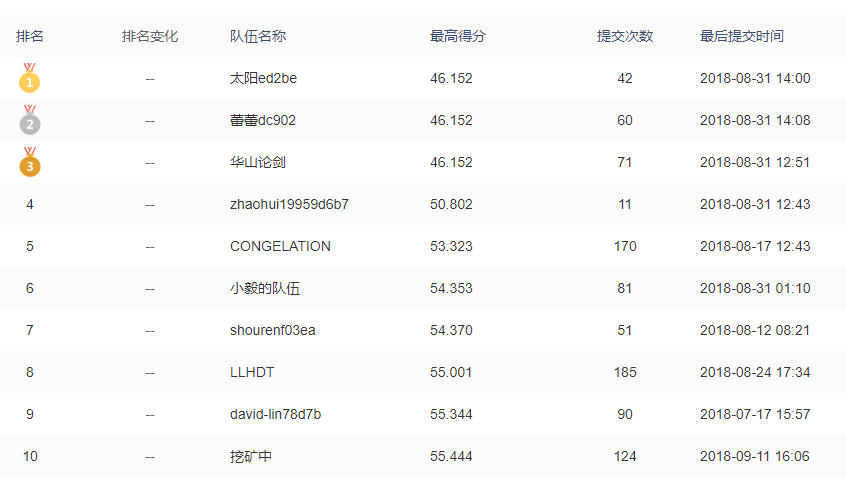

<div class="alert alert-block alert-success">
    
- 最终结果大概排在前10名。

</div>